# Imports Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Step 1
import data Set

In [43]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Step 2 Performaing EDA on Data

# Checking the data type

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [45]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking Null Values

In [46]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Checking the duplicate values

In [47]:
df.duplicated().sum()

0

# Step 3. Ploting the data to check for the outliers.

Text(0.5, 1.0, 'Salary')

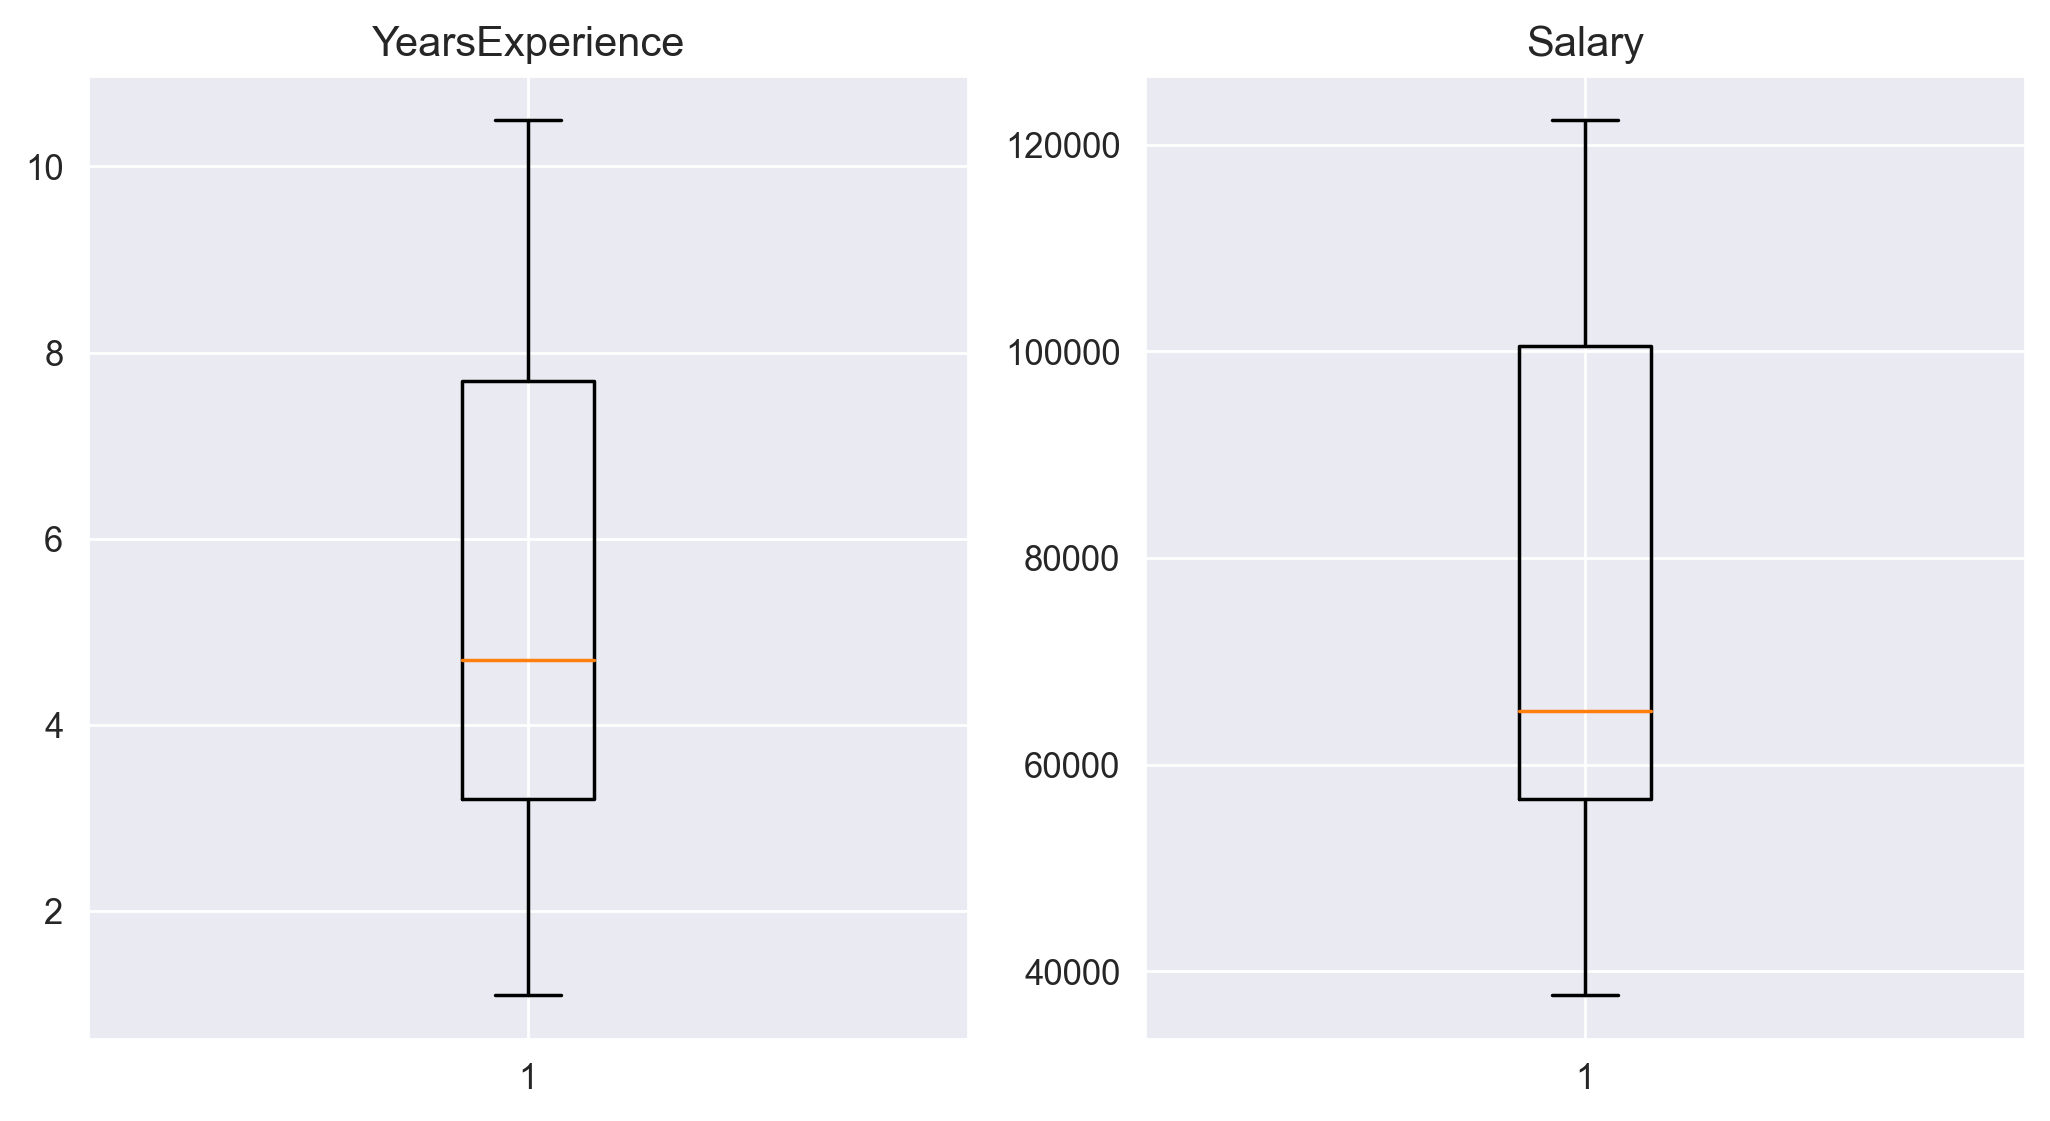

In [48]:
plt.subplot(1,2,1)
plt.boxplot(df["YearsExperience"])
plt.title("YearsExperience")
plt.subplot(1,2,2)
plt.boxplot(df["Salary"])
plt.title("Salary")

# As you can see there are no Outliers in the data

# Step 4. Checking the Correlation between the variable

In [49]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

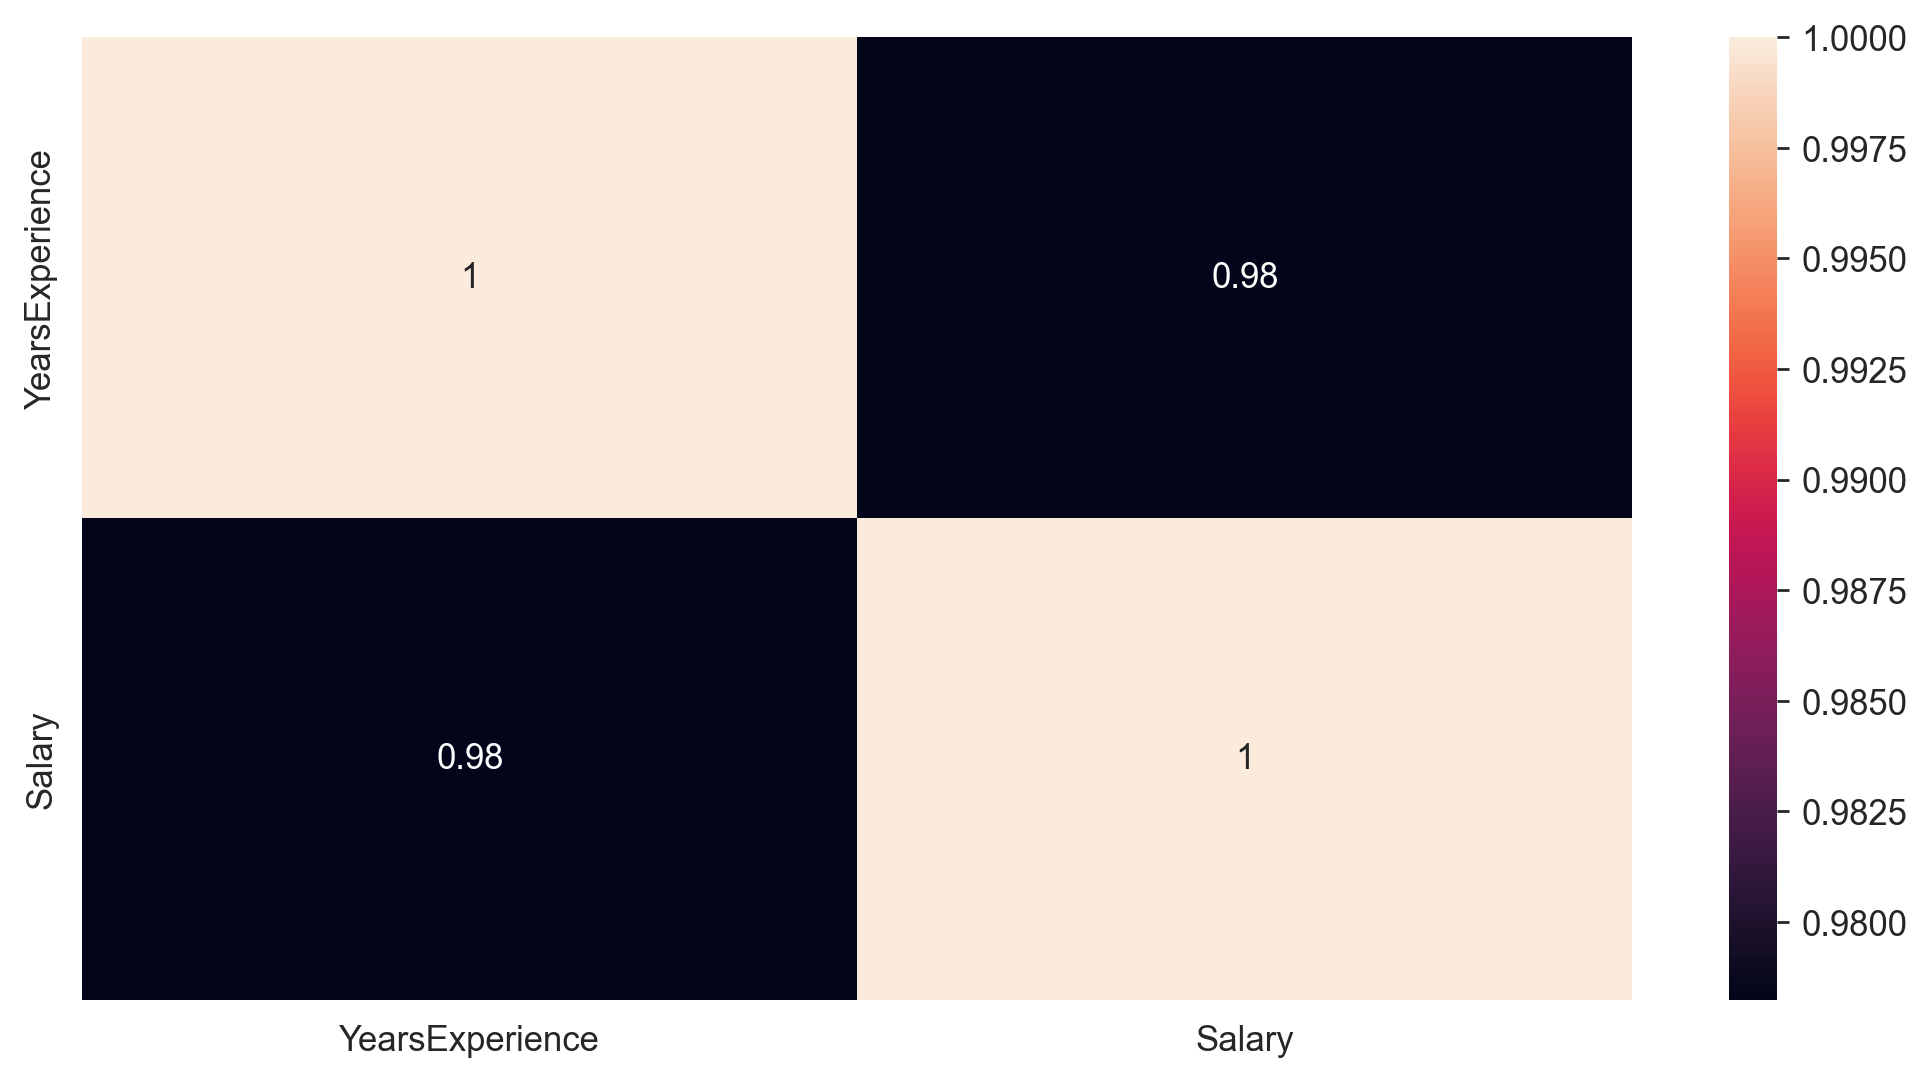

In [50]:
sns.heatmap(df.corr(),annot=True)

# Visualization of Correlation beteen x and y

regplot = regression plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

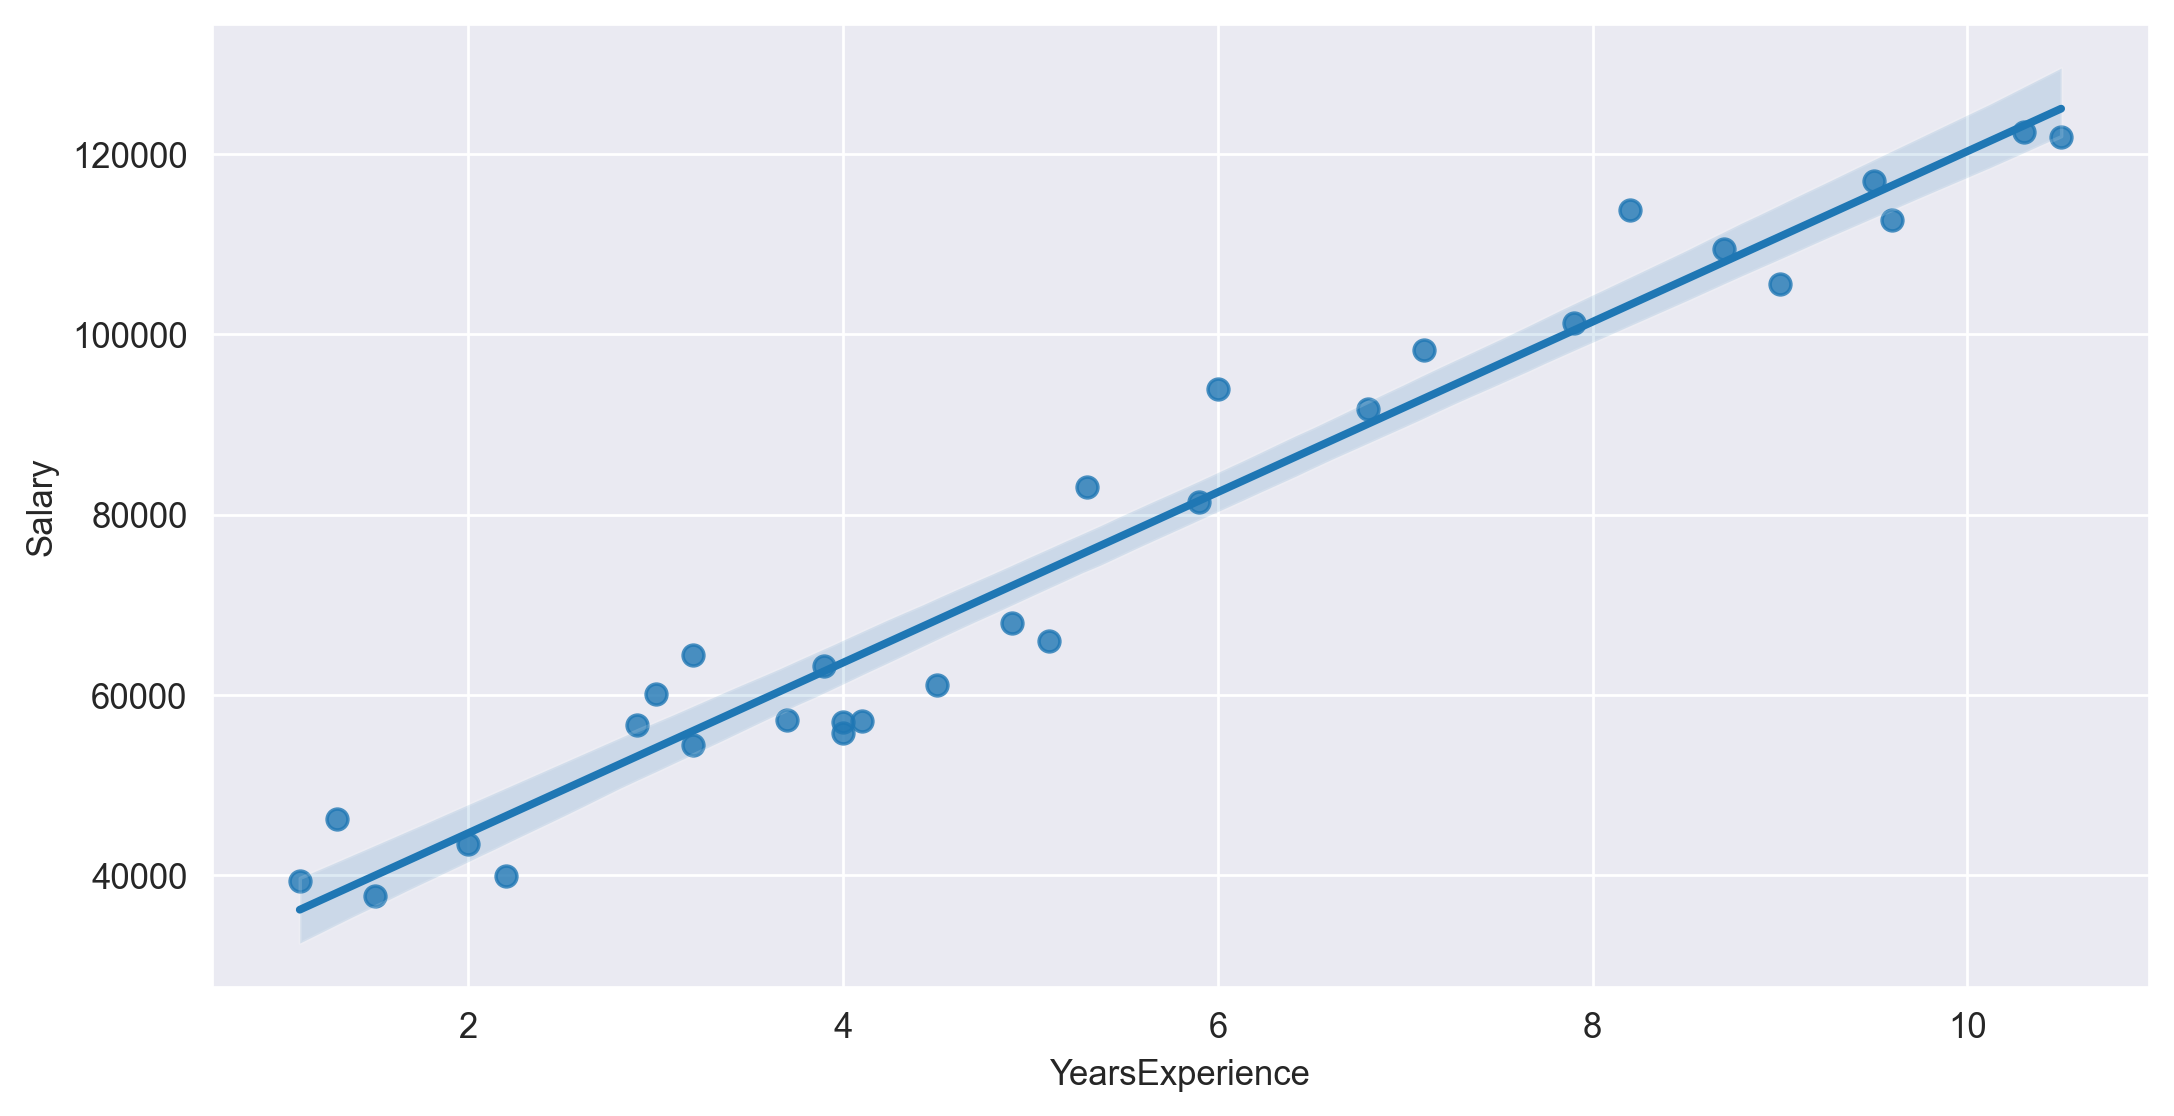

In [51]:
sns.regplot(x=df["YearsExperience"], y=df["Salary"])

# As you can see above

There is strong correlation between the two variable. The score is more than 9.8 which is a very strong sign

# Step 5. Checking for Homoscedasticity or Hetroscedasticity

Text(0.5, 1.0, 'Hetroscedasticity')

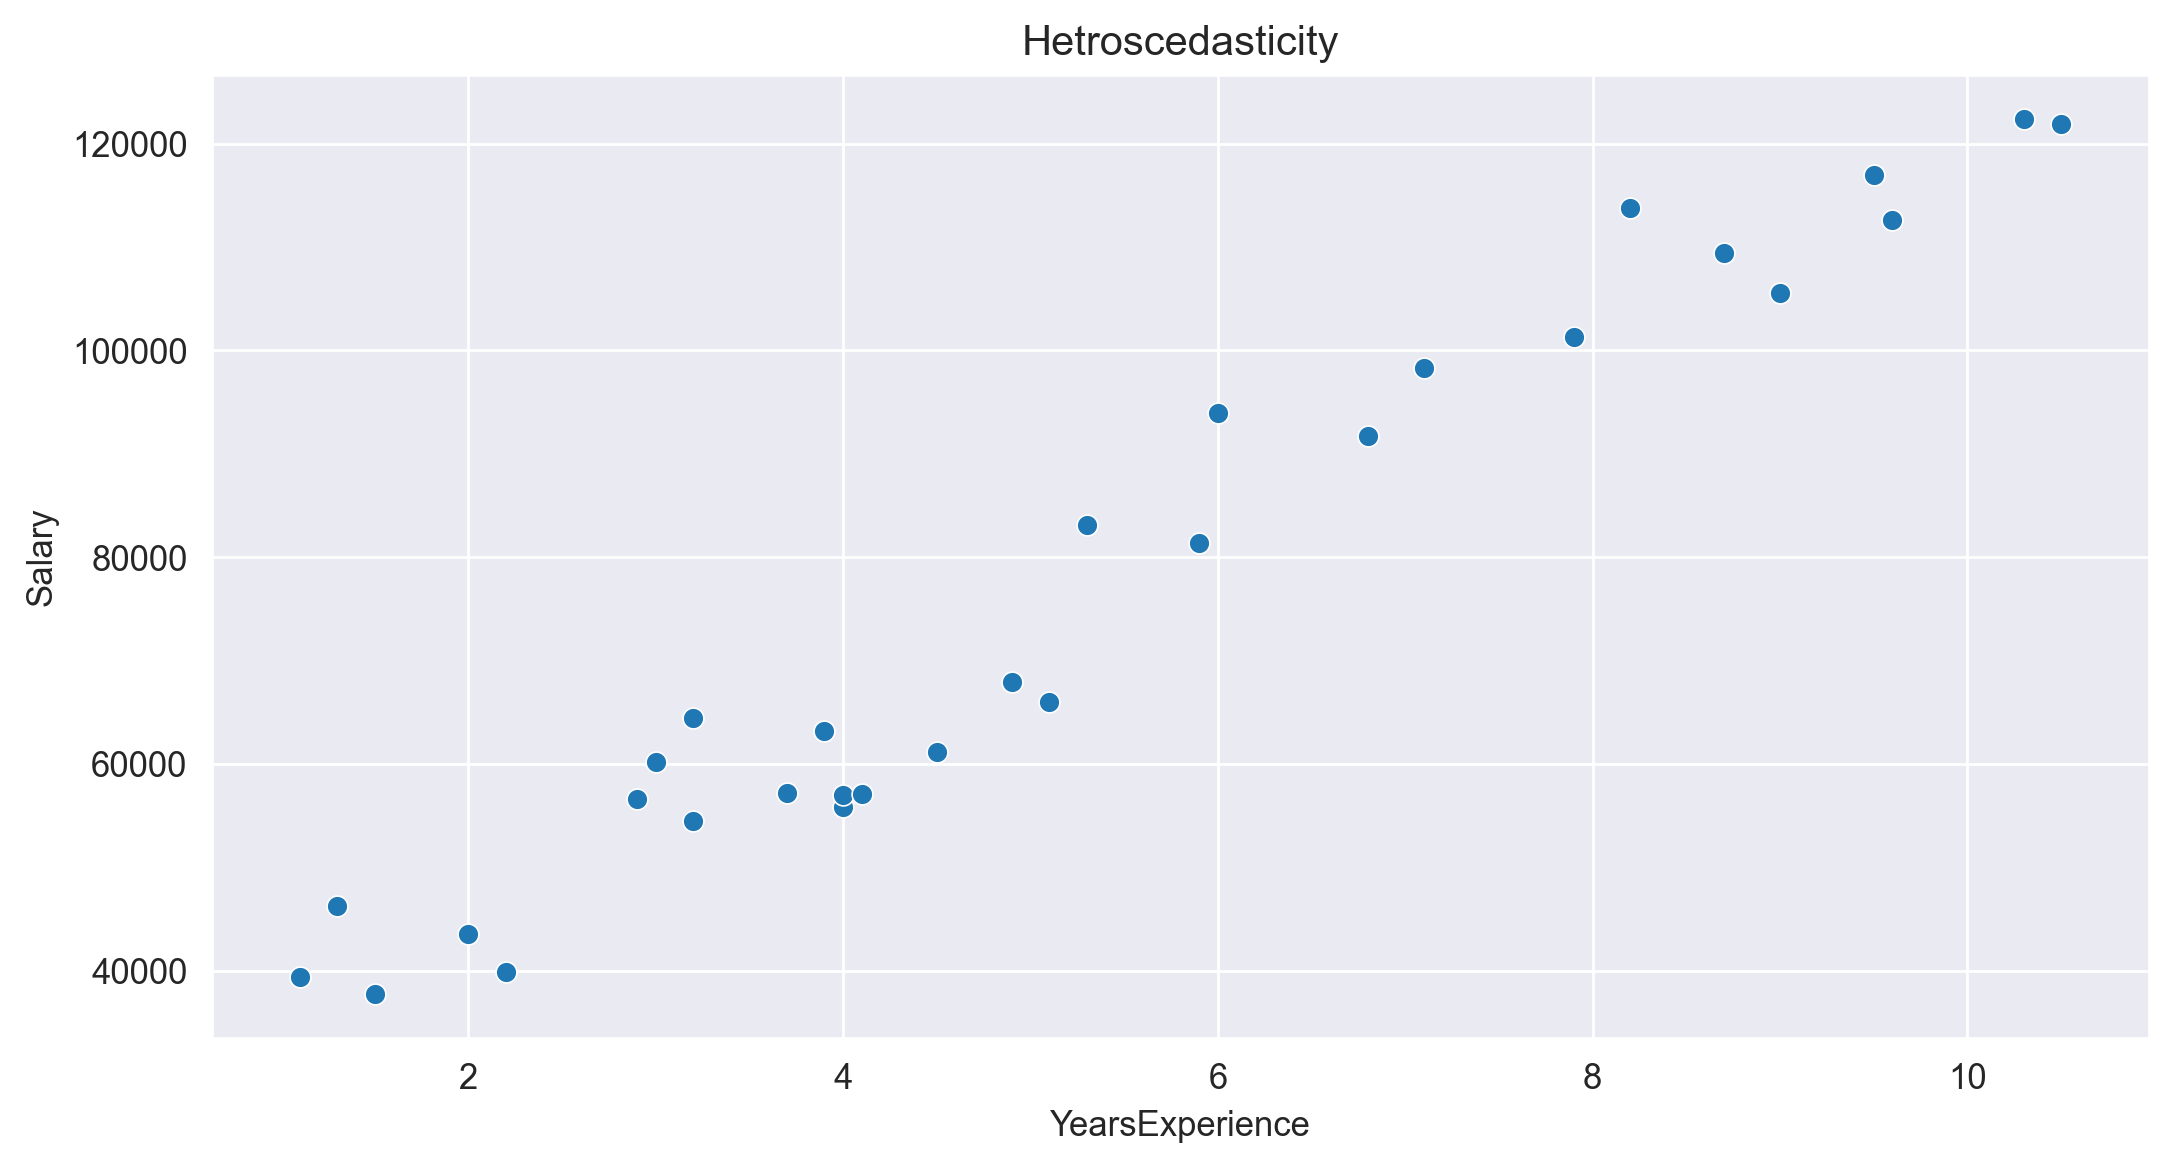

In [52]:
sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])
plt.title("Hetroscedasticity")

In [53]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# As you can see in above graph

It shows as the Years of experience Increases salary range is also increases with much variation along the way

The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

# Step 6. Feature Engineering¶

Trying different transformation of data to estimate normal distribution and to remove any skewness

Text(0.5, 1.0, 'After Transformation')

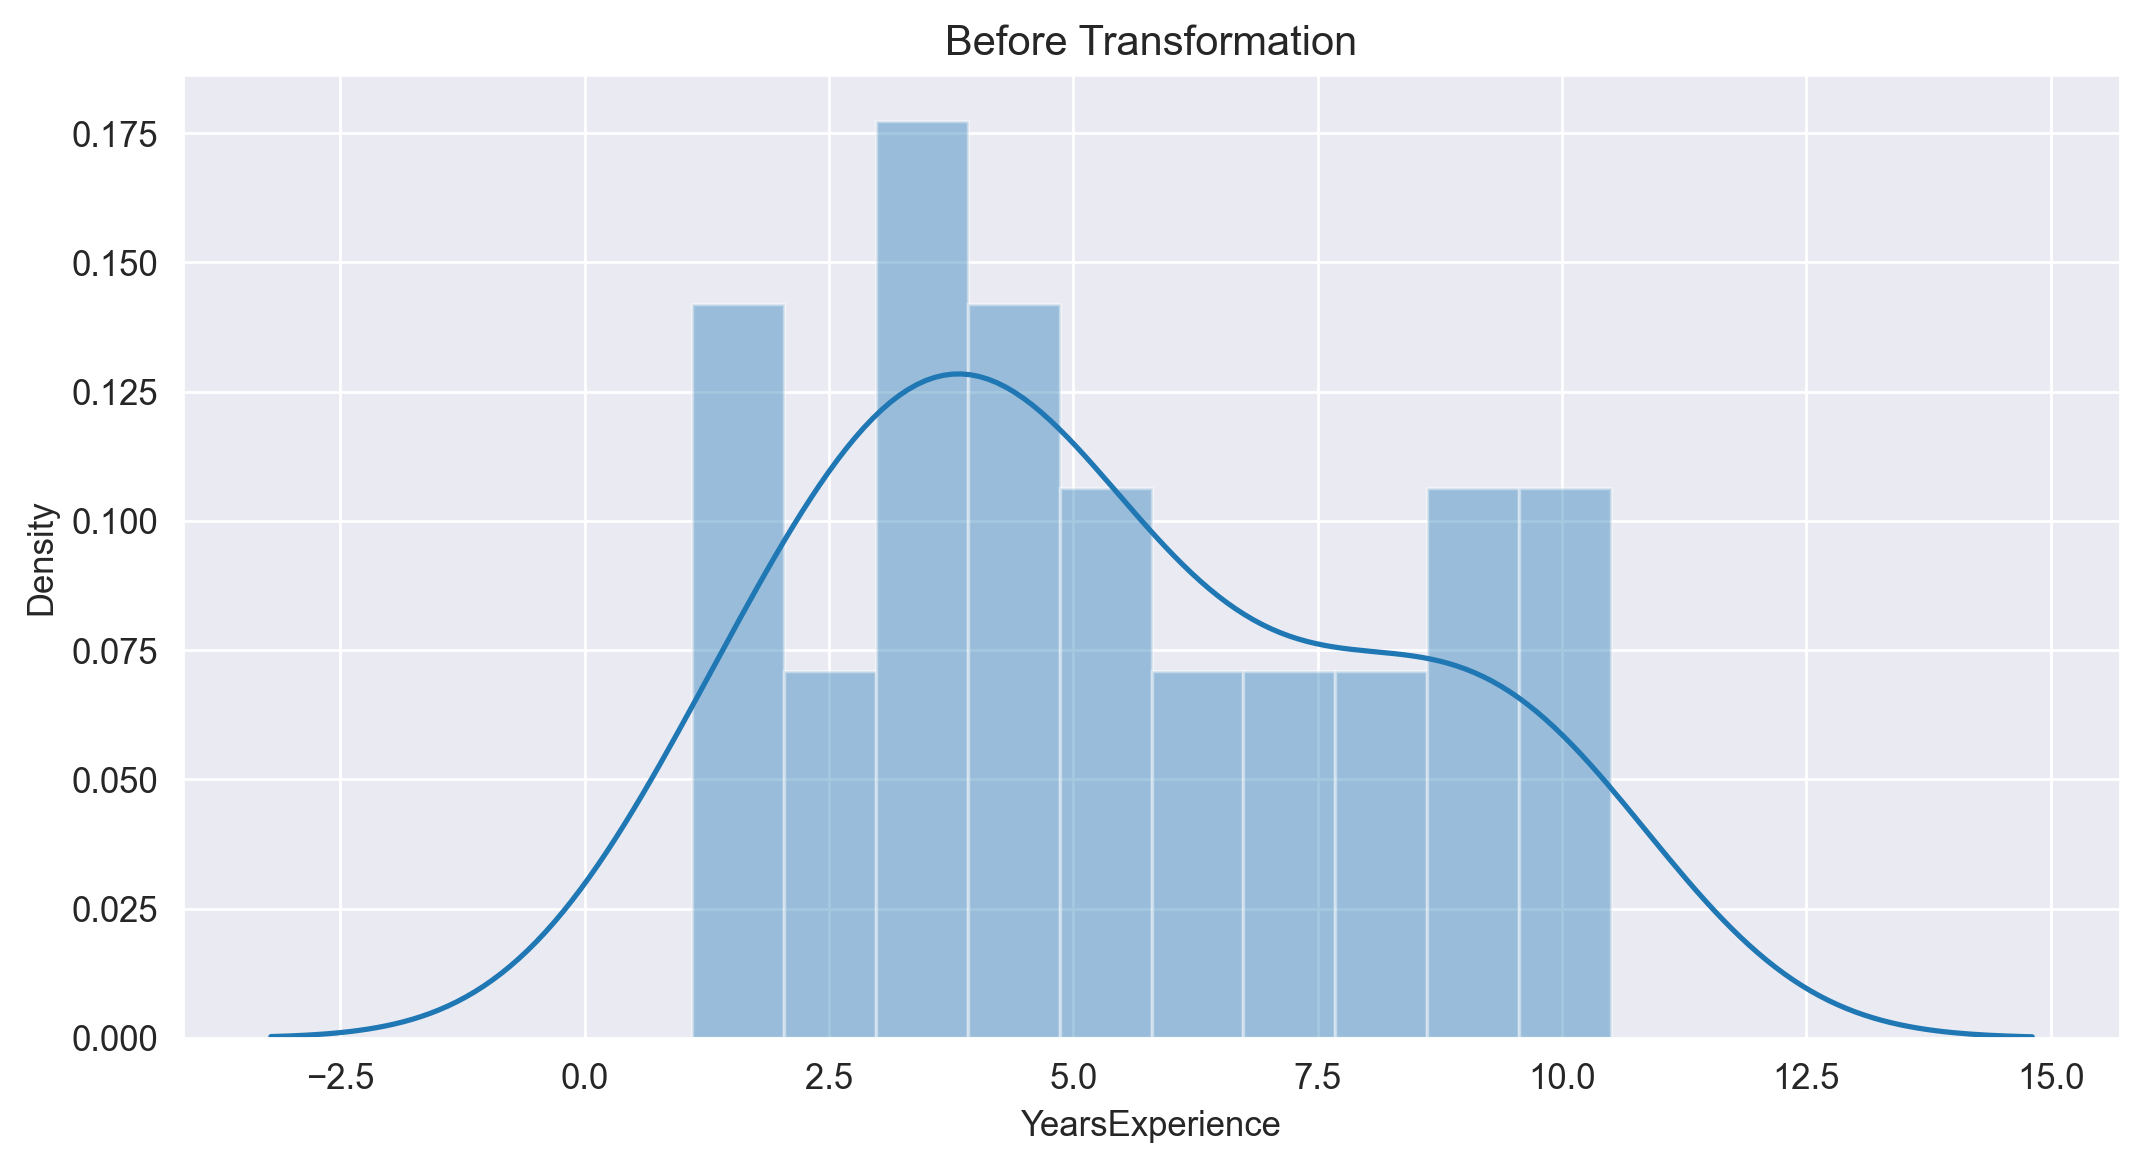

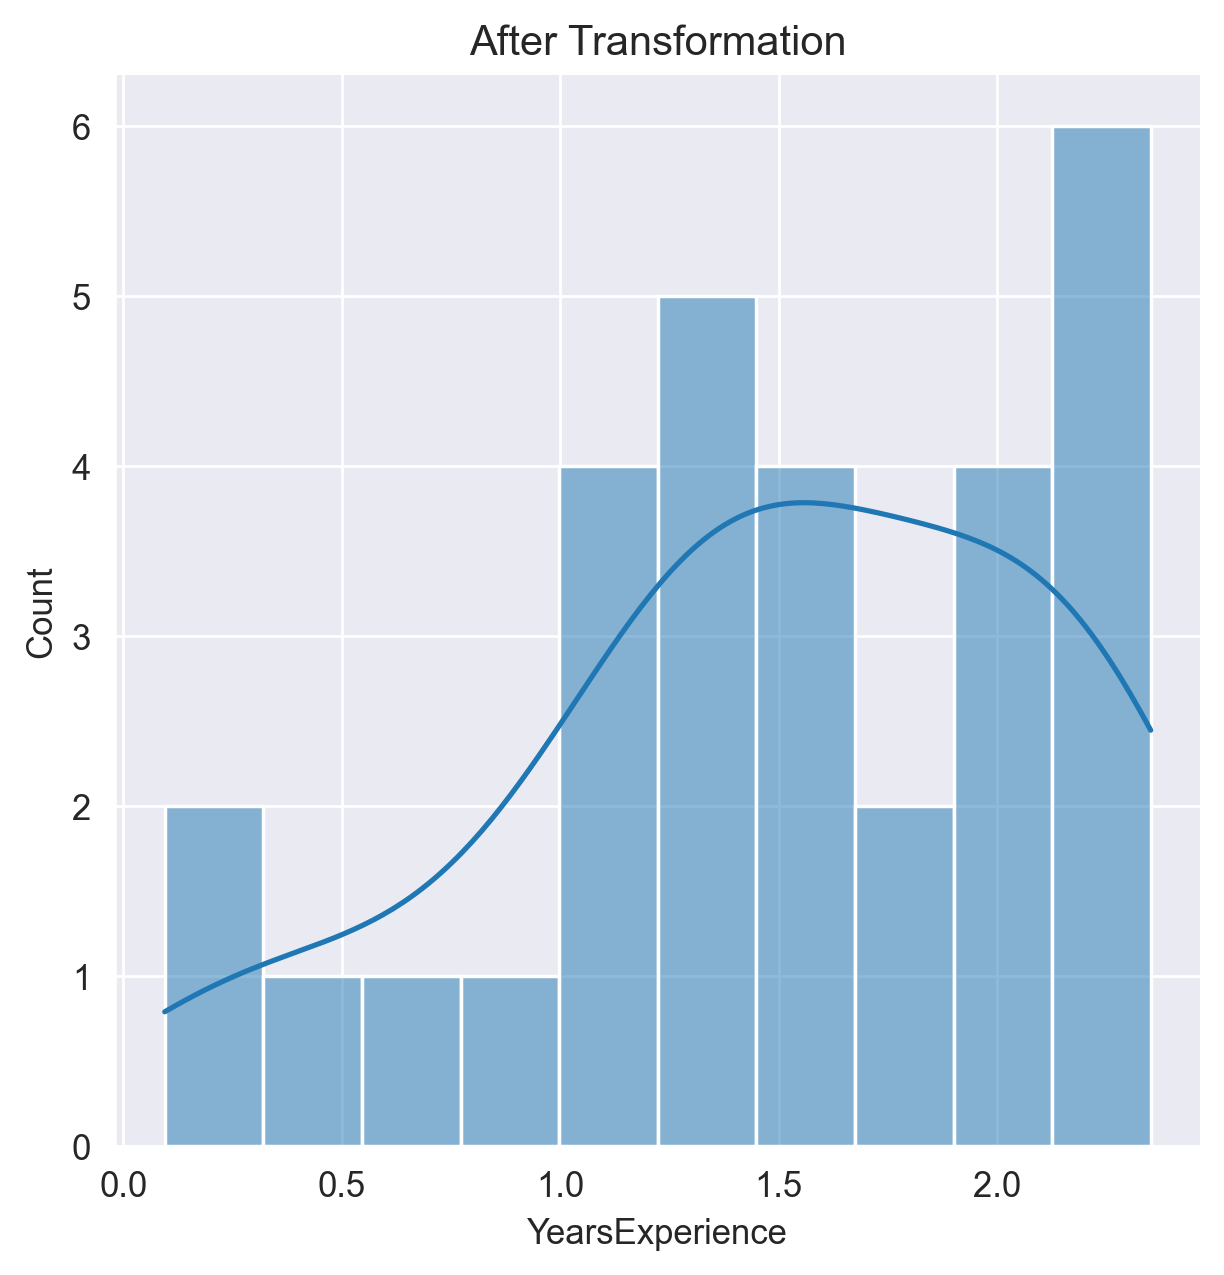

In [54]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']),bins = 10, kde = True)
plt.title('After Transformation')

# As you can see

How log transformation affects the data and it scales the values down.

Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

Text(0.5, 1.0, 'Log Transformation')

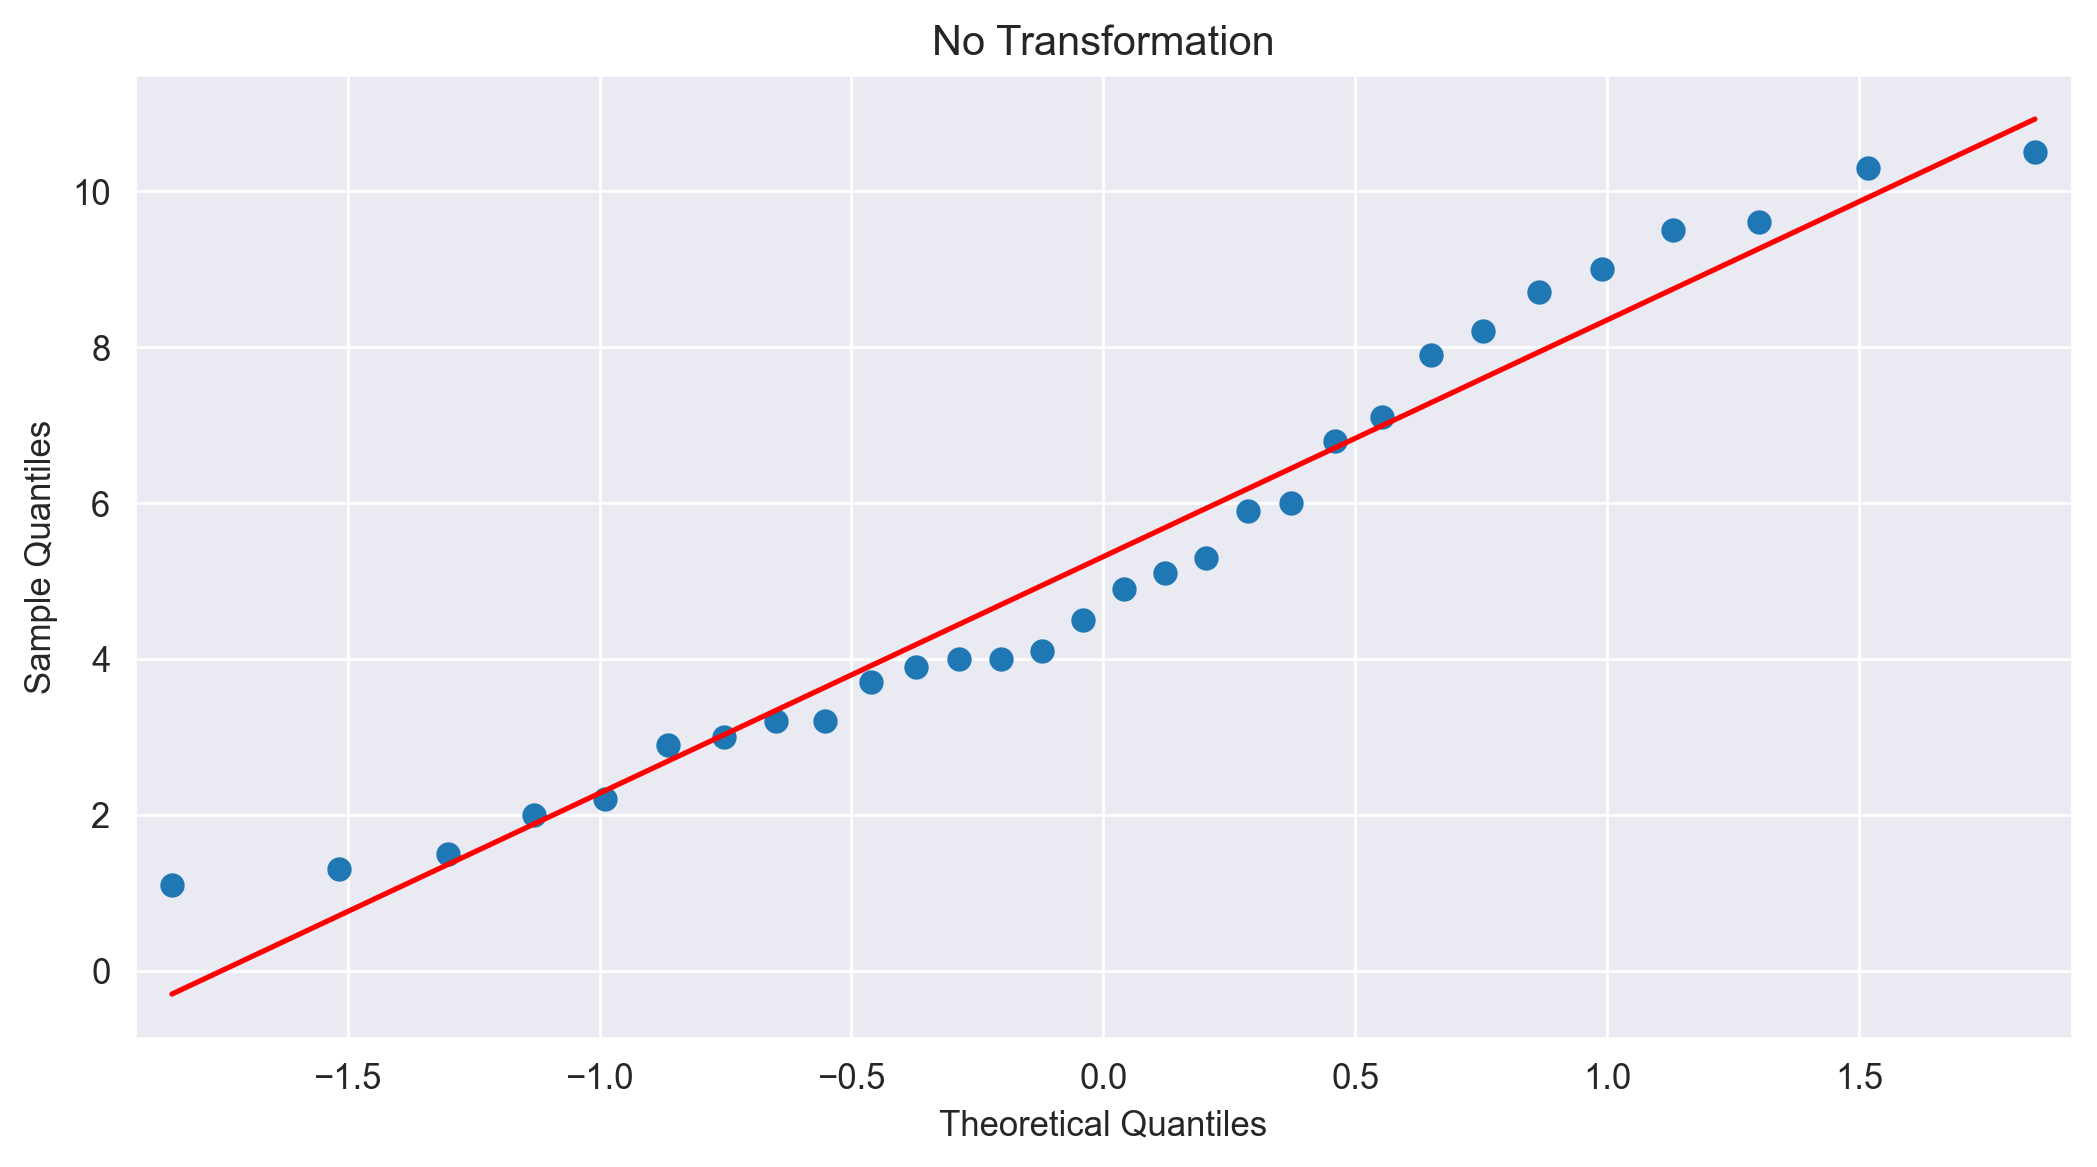

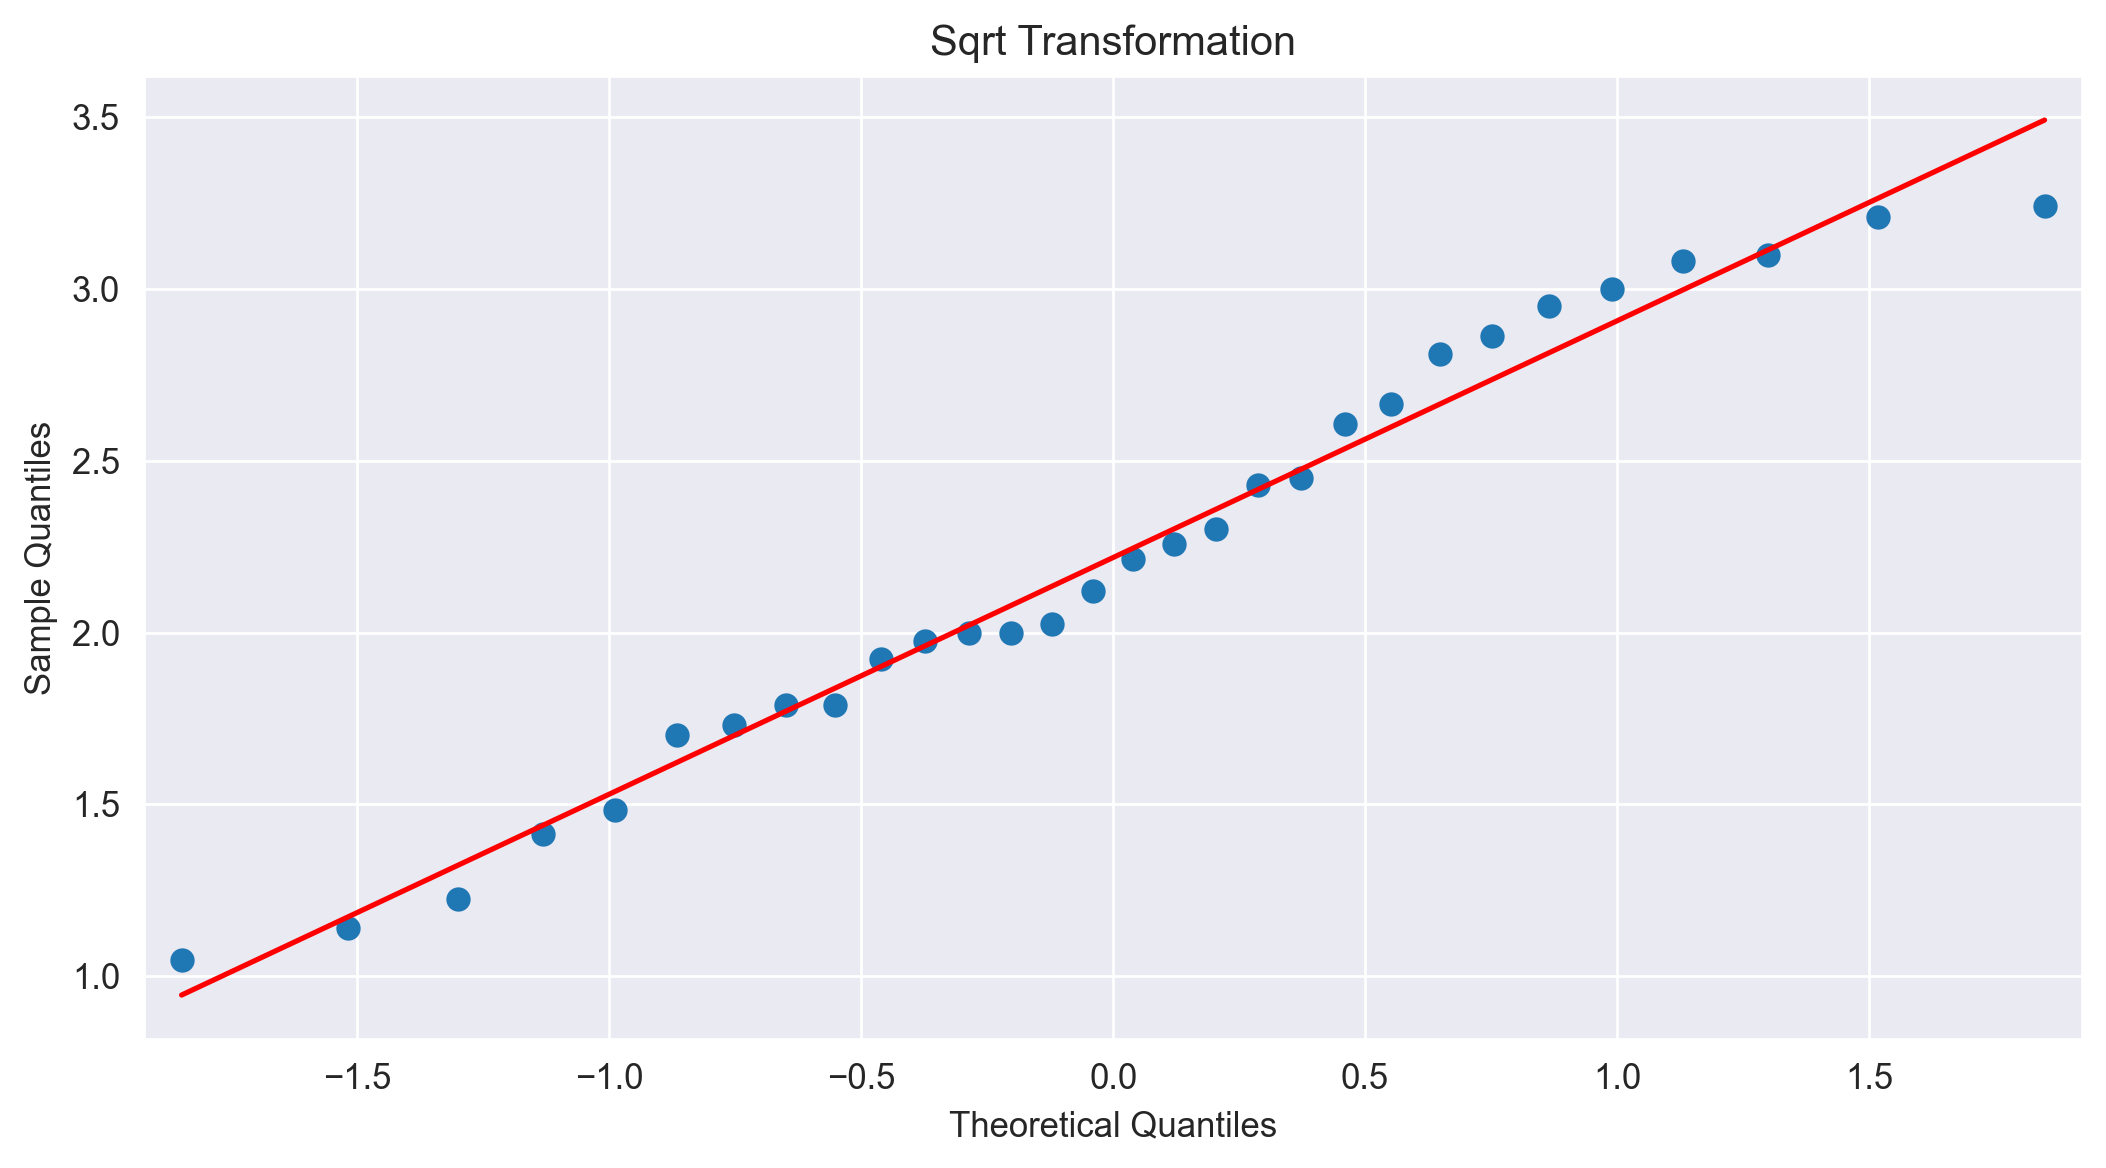

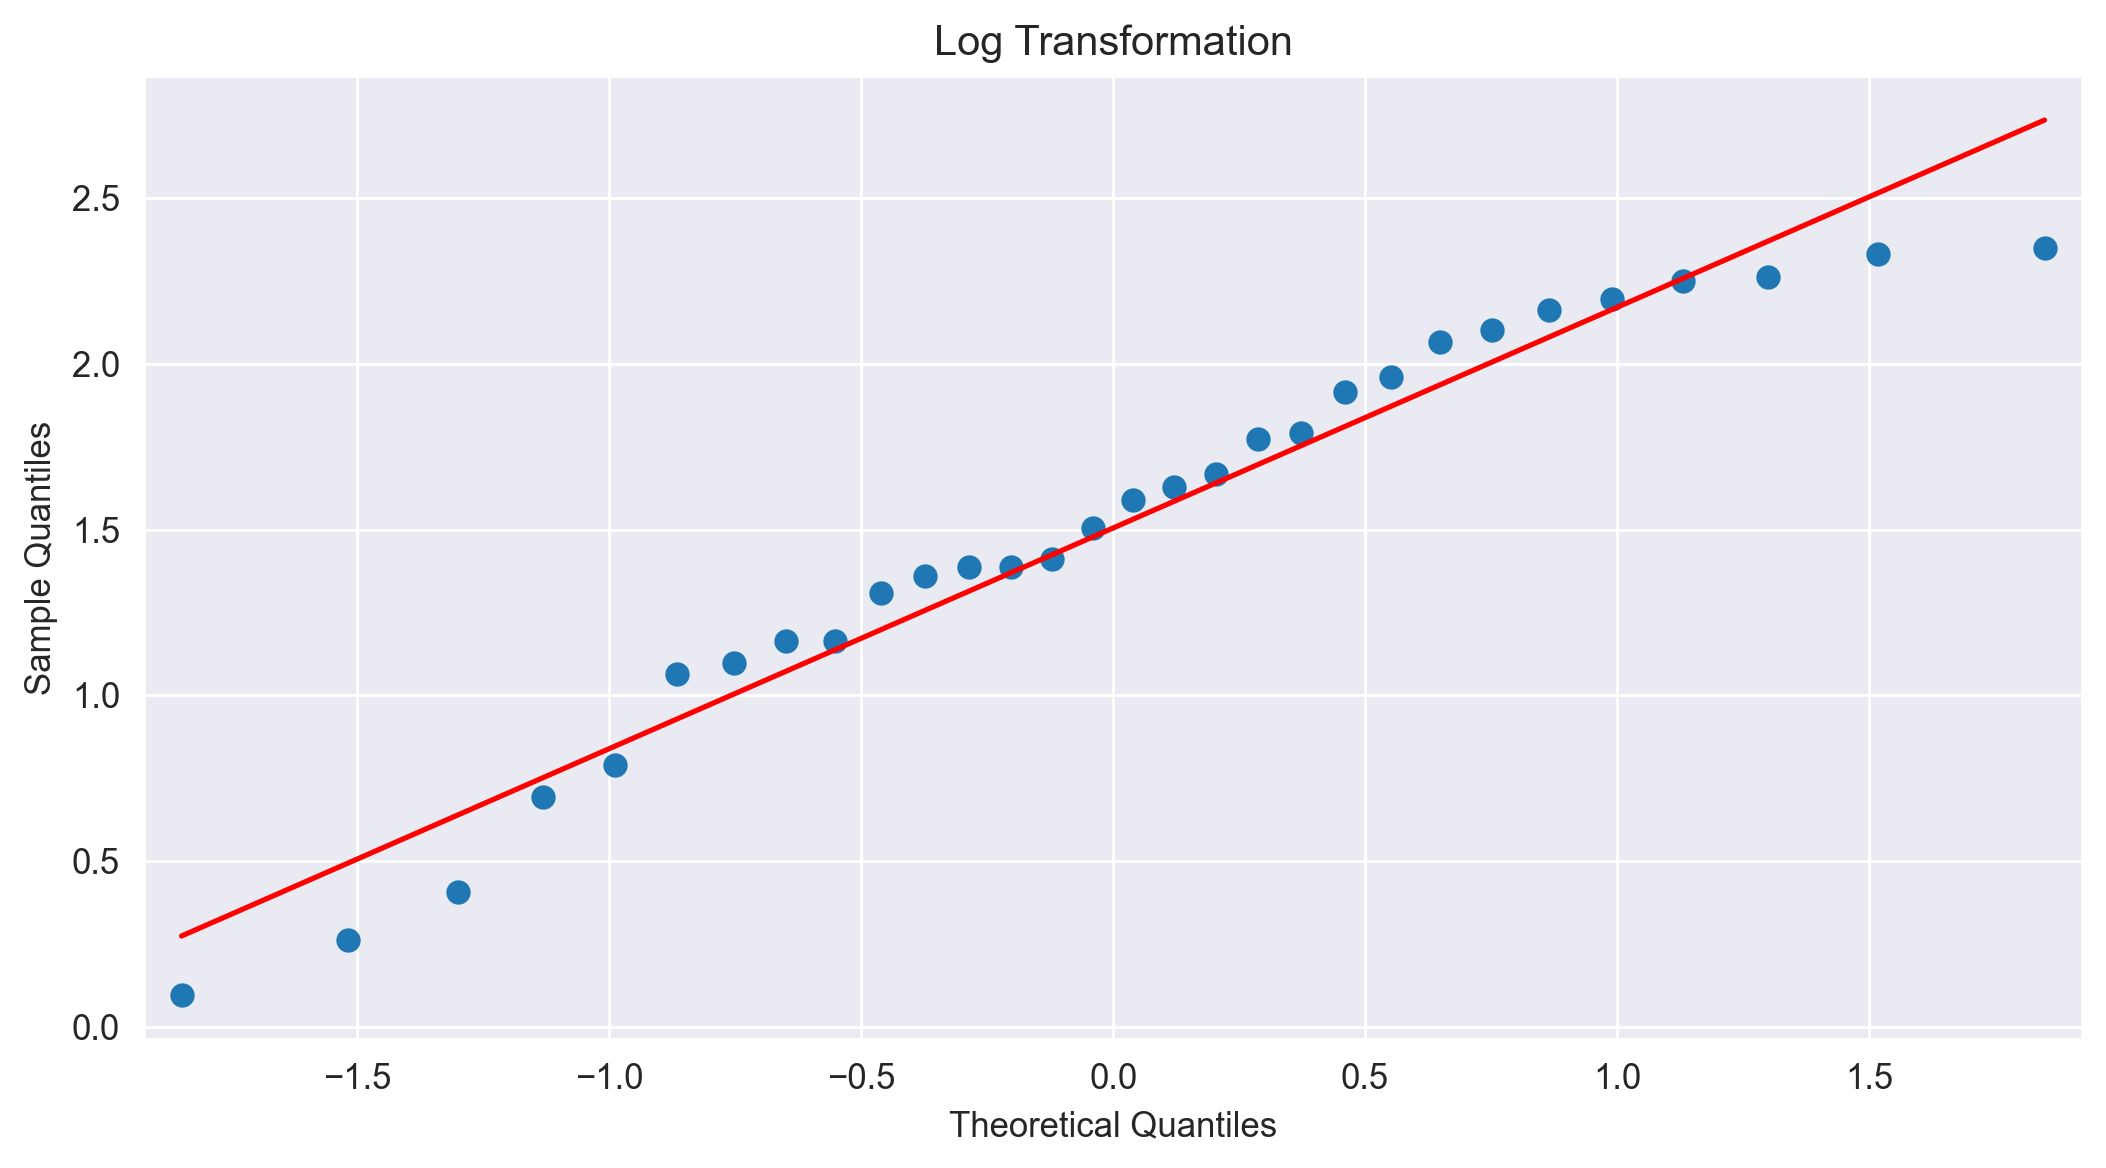

In [60]:
sm.qqplot(df["YearsExperience"], line = "r")
plt.title("No Transformation")
sm.qqplot(np.sqrt(df["YearsExperience"]), line = "r")
plt.title ("Sqrt Transformation")
sm.qqplot(np.log(df["YearsExperience"]), line = "r")
plt.title ("Log Transformation")

Text(0.5, 1.0, 'Log Transformation')

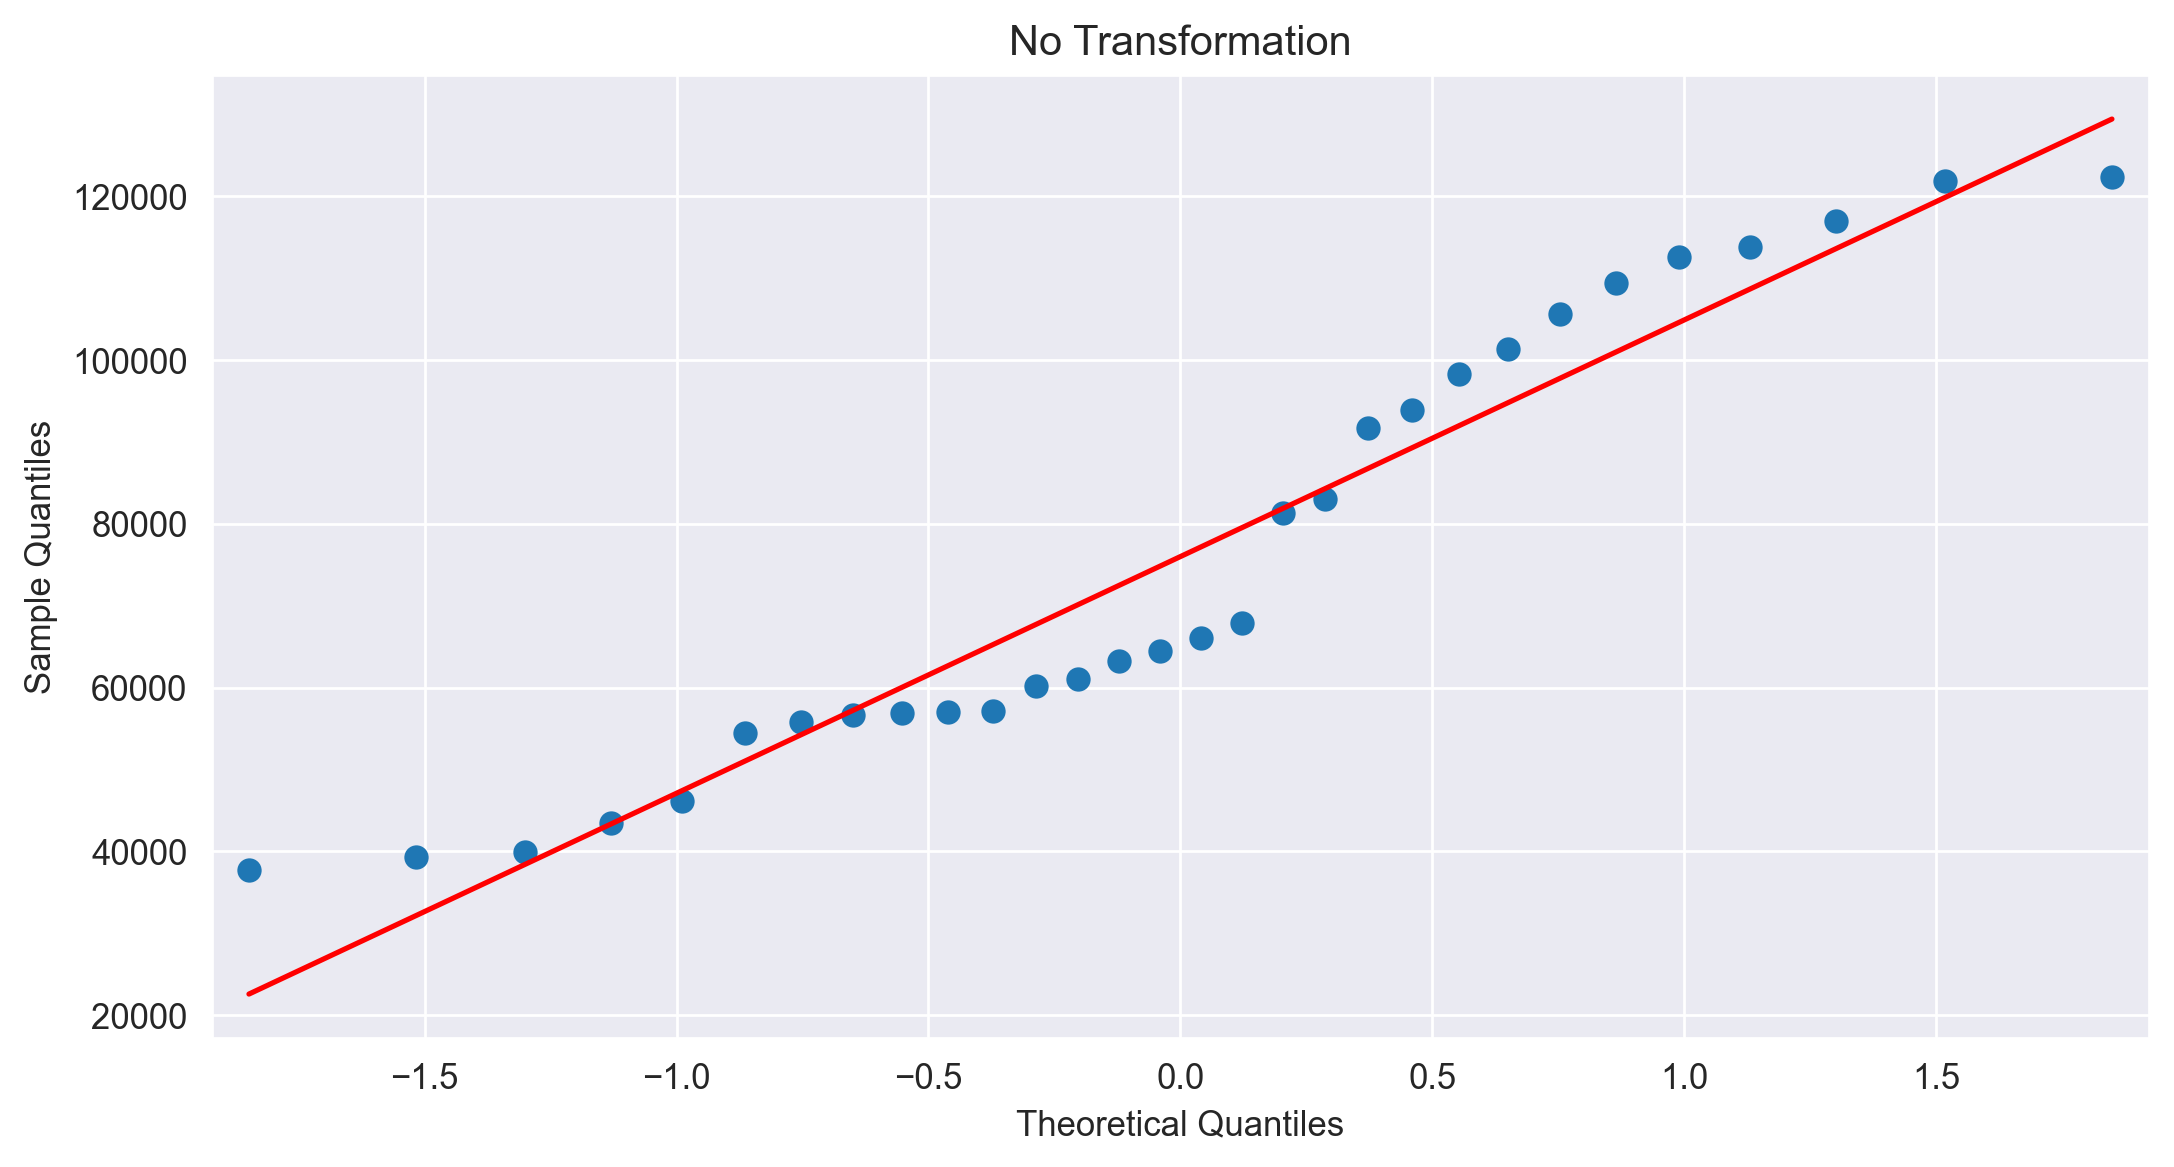

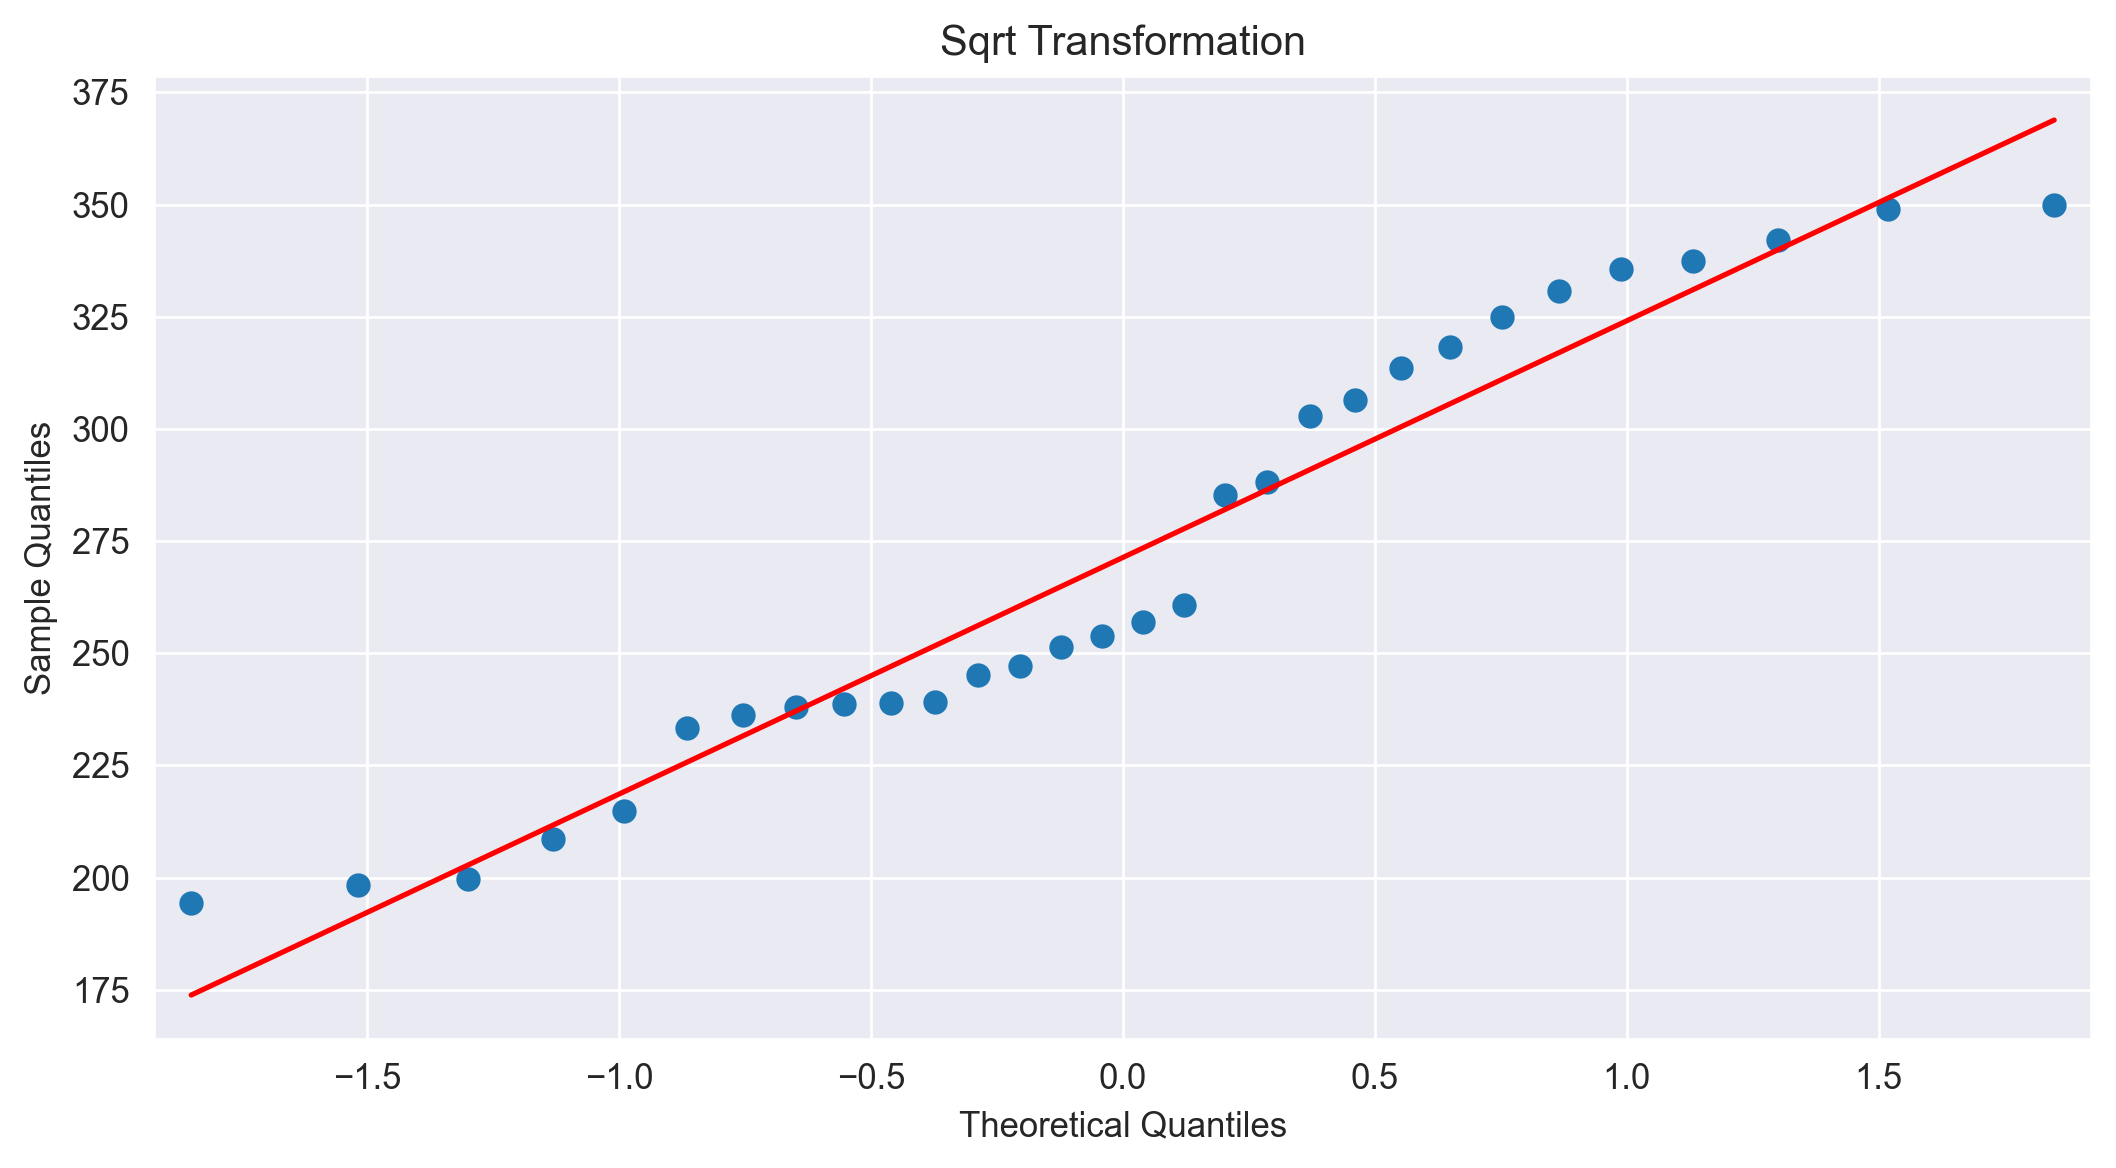

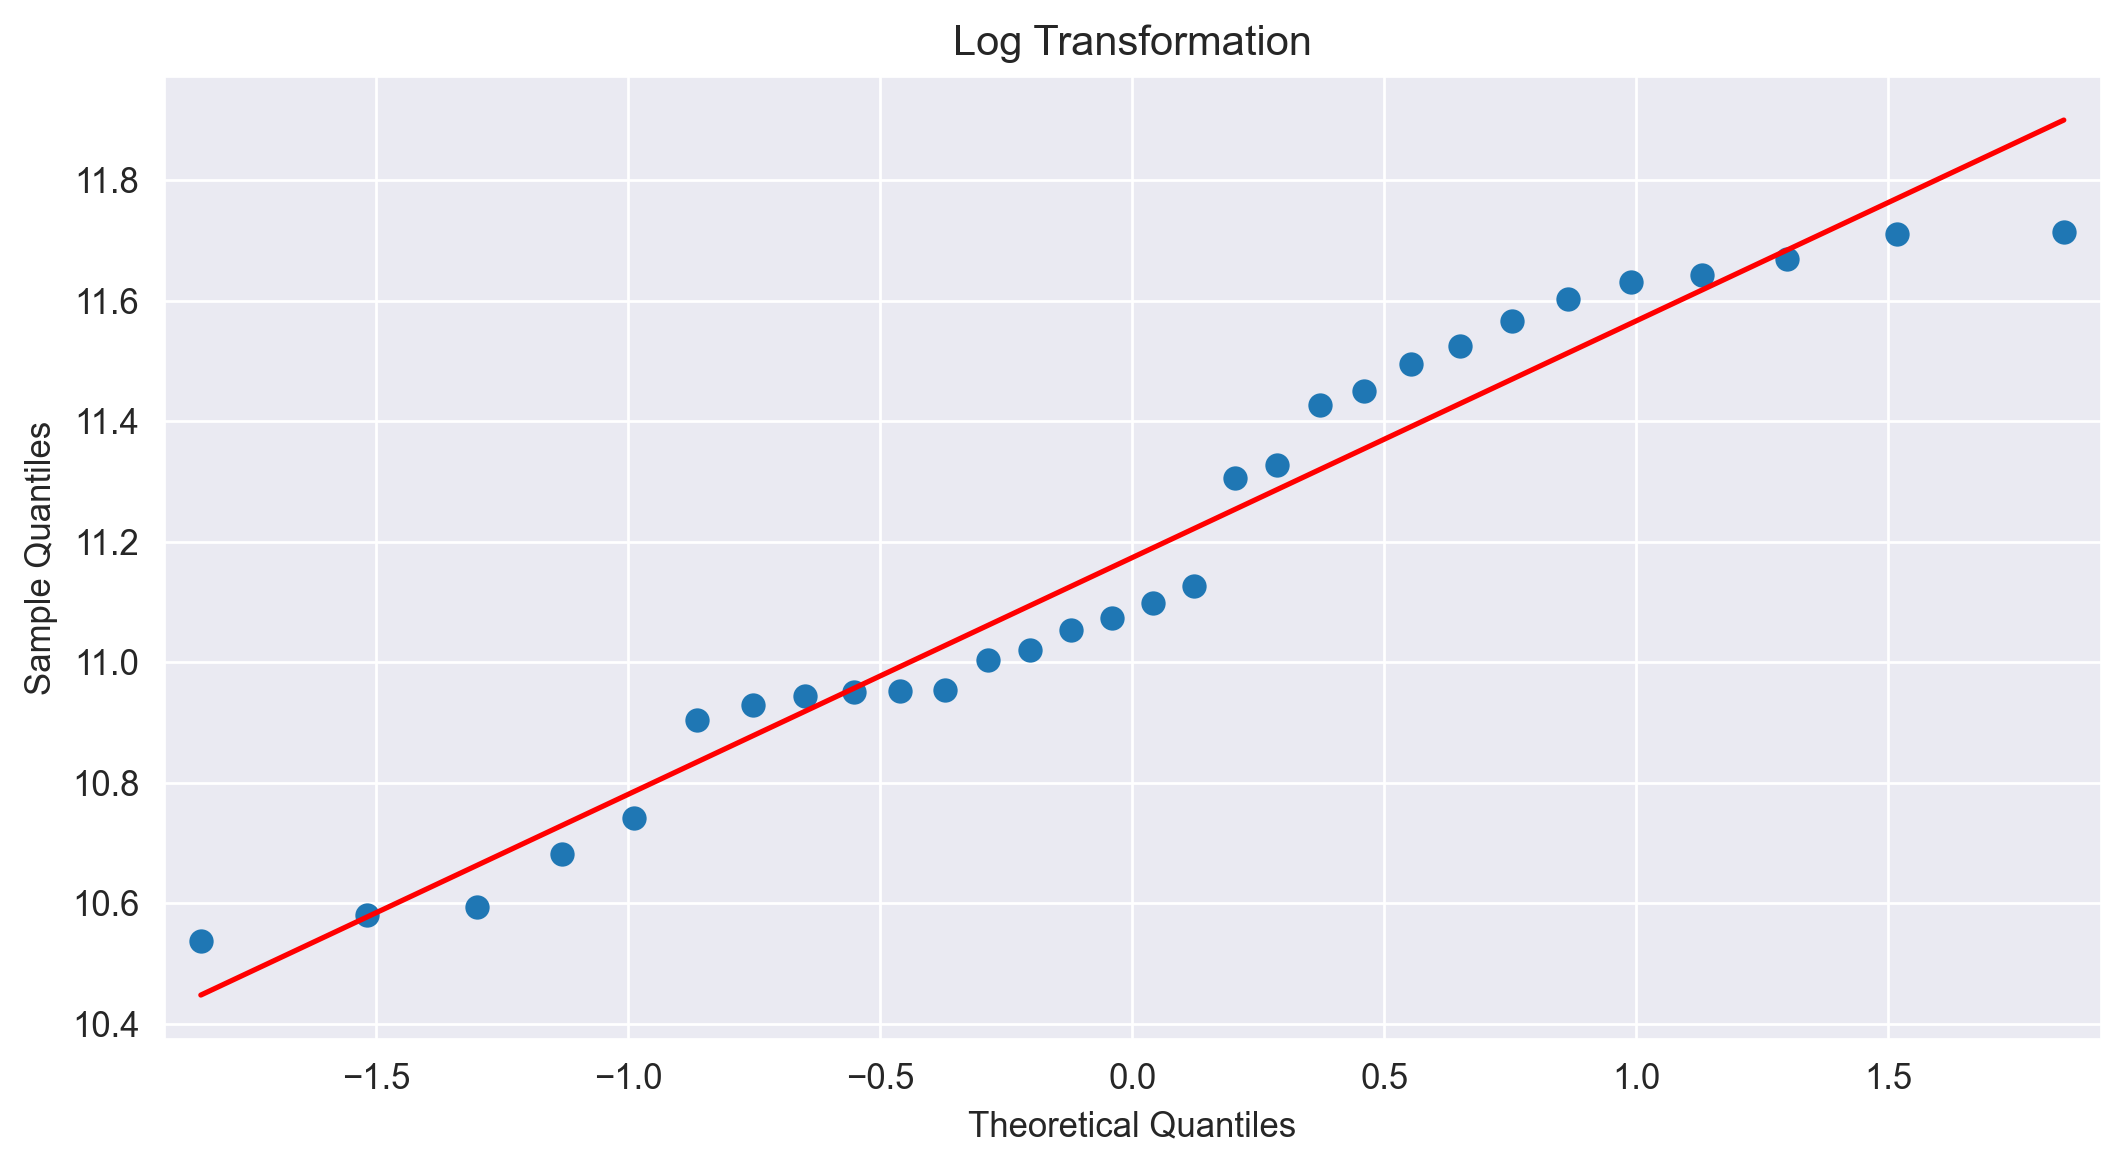

In [61]:
sm.qqplot(df["Salary"], line = "r")
plt.title("No Transformation")
sm.qqplot(np.sqrt(df["Salary"]), line = "r")
plt.title ("Sqrt Transformation")
sm.qqplot(np.log(df["Salary"]), line = "r")
plt.title ("Log Transformation")

# Note:

we only Perform any data transformation when the data is skewed or not normal

# Step 7 . Fitting a Linear Regression Model

Using Ordinary least squares (OLS) regression 

In [62]:
model = smf.ols("Salary~YearsExperience", data=df).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        18:28:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model

The R-squared and Adjusted R-squared scores are above 0.85.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

F-statitics is quite high as well and yes desire it to be higher

But log-likelihood is quite very low far away from 0

and AIC and BIC score are much higher for this model

Lets Try some data transformation to check whether these scores can get any better than this.

# Square Root Transformation

In [66]:
model1 = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.58e-19
Time:                        18:29:51   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation

In [65]:
model2 = smf.ols("np.log(Salary)~np.log(YearsExperience)", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        18:29:23   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 8. Residual Analysis.

# Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of Model without any data transformation')

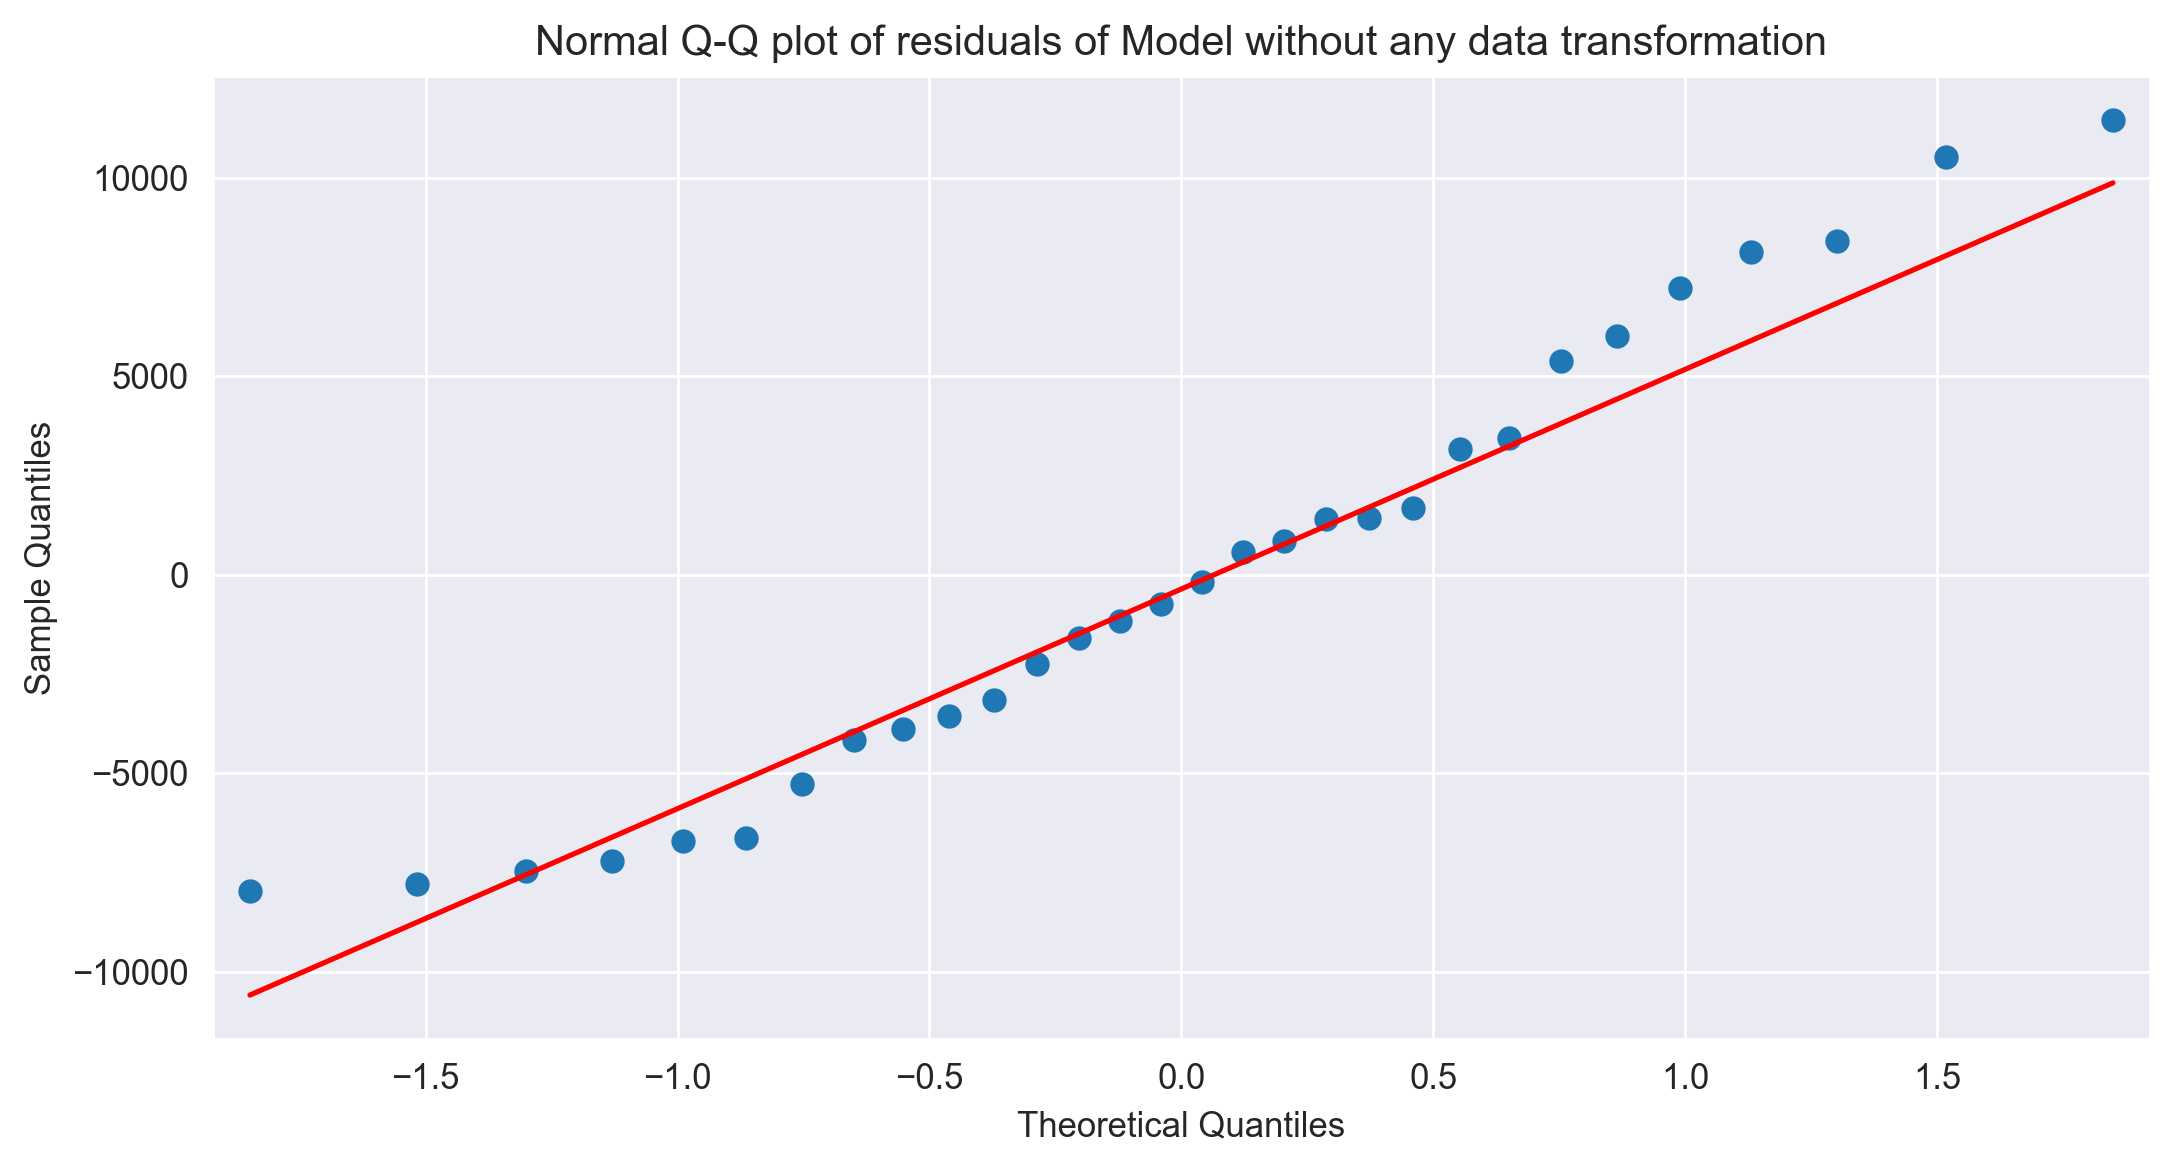

In [67]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of Model with Sqrt transformation')

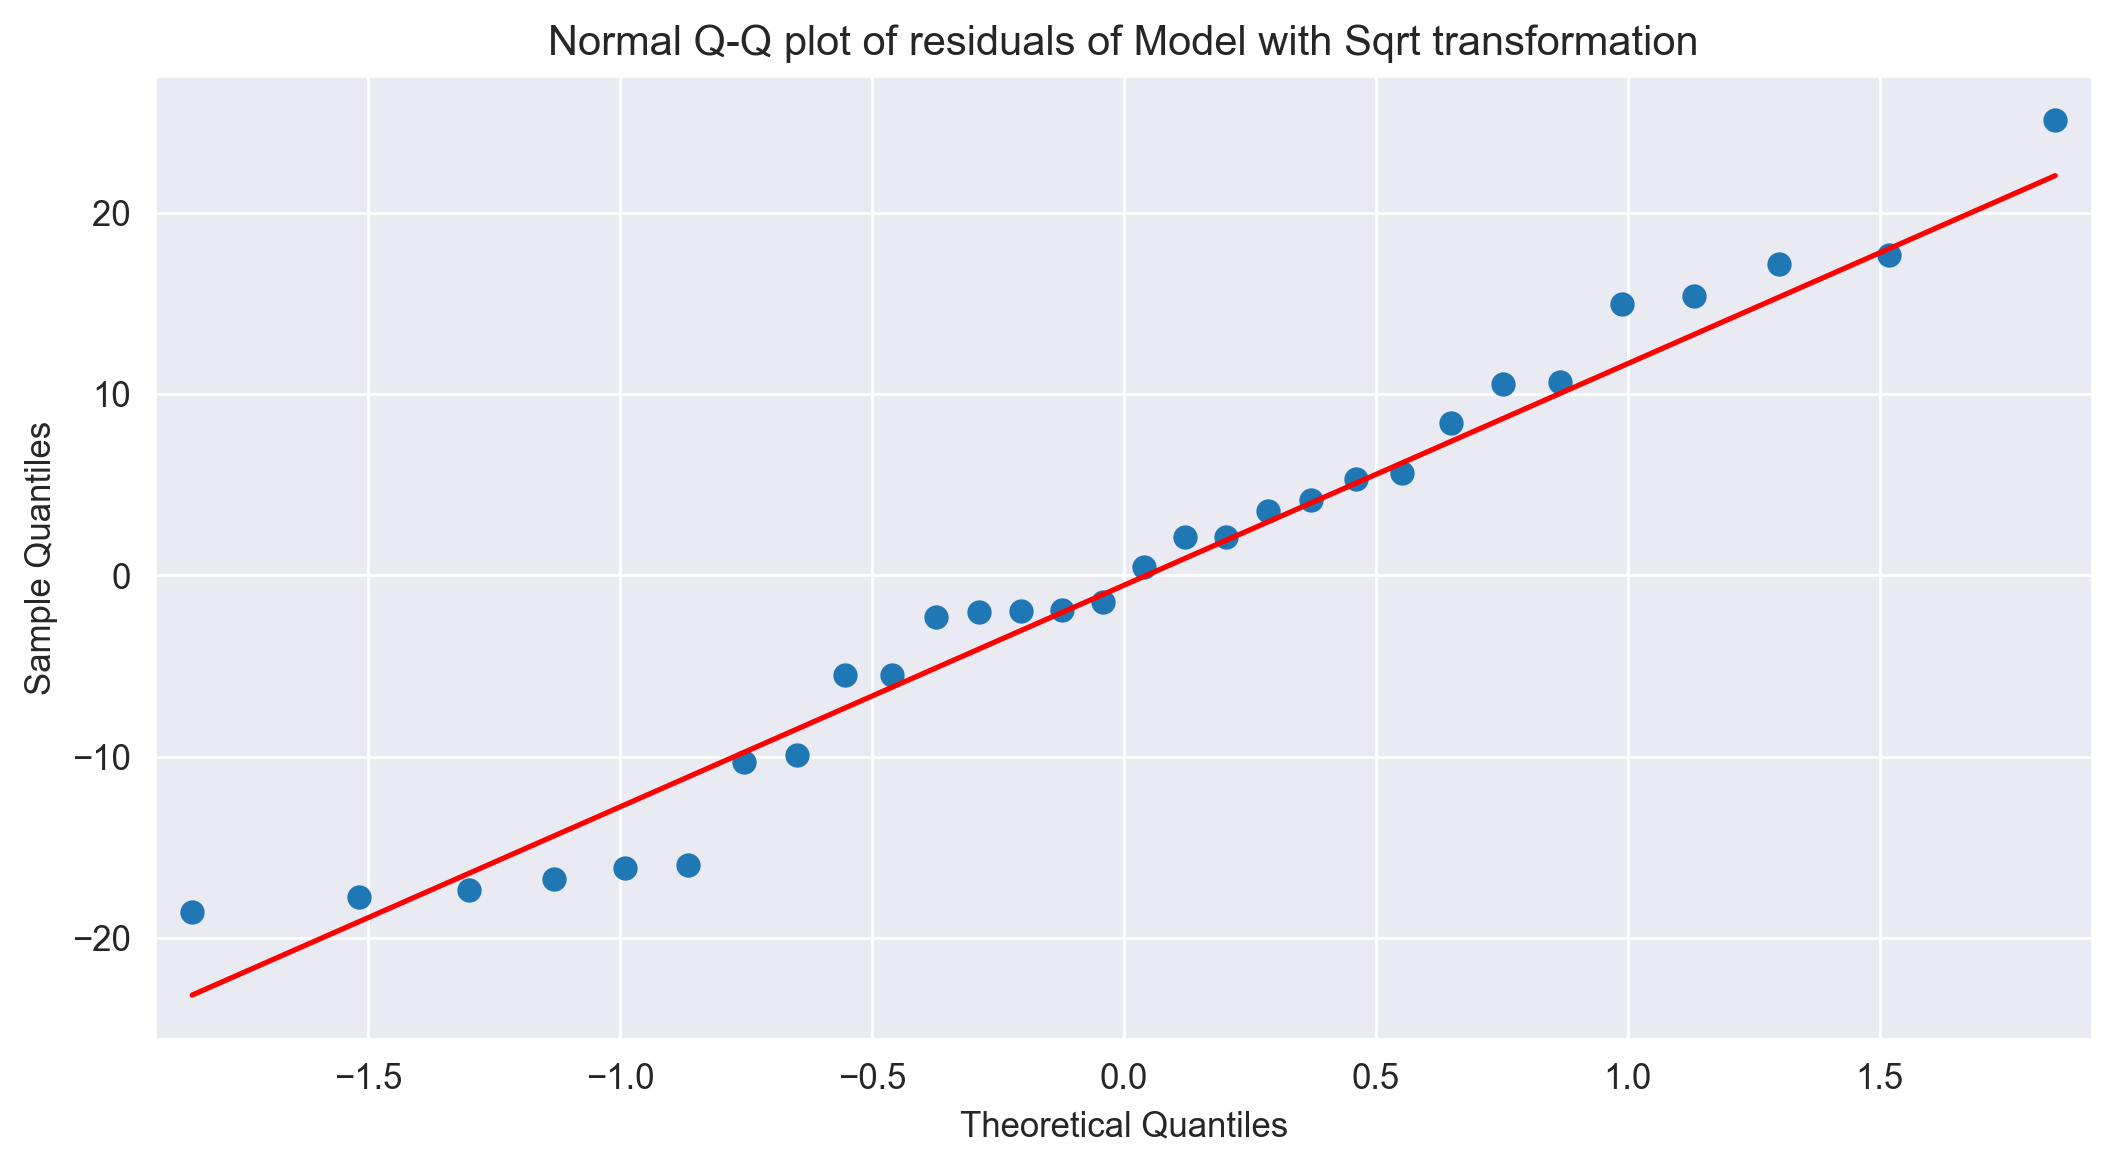

In [68]:
sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Sqrt transformation')

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of Model with Log transformation')

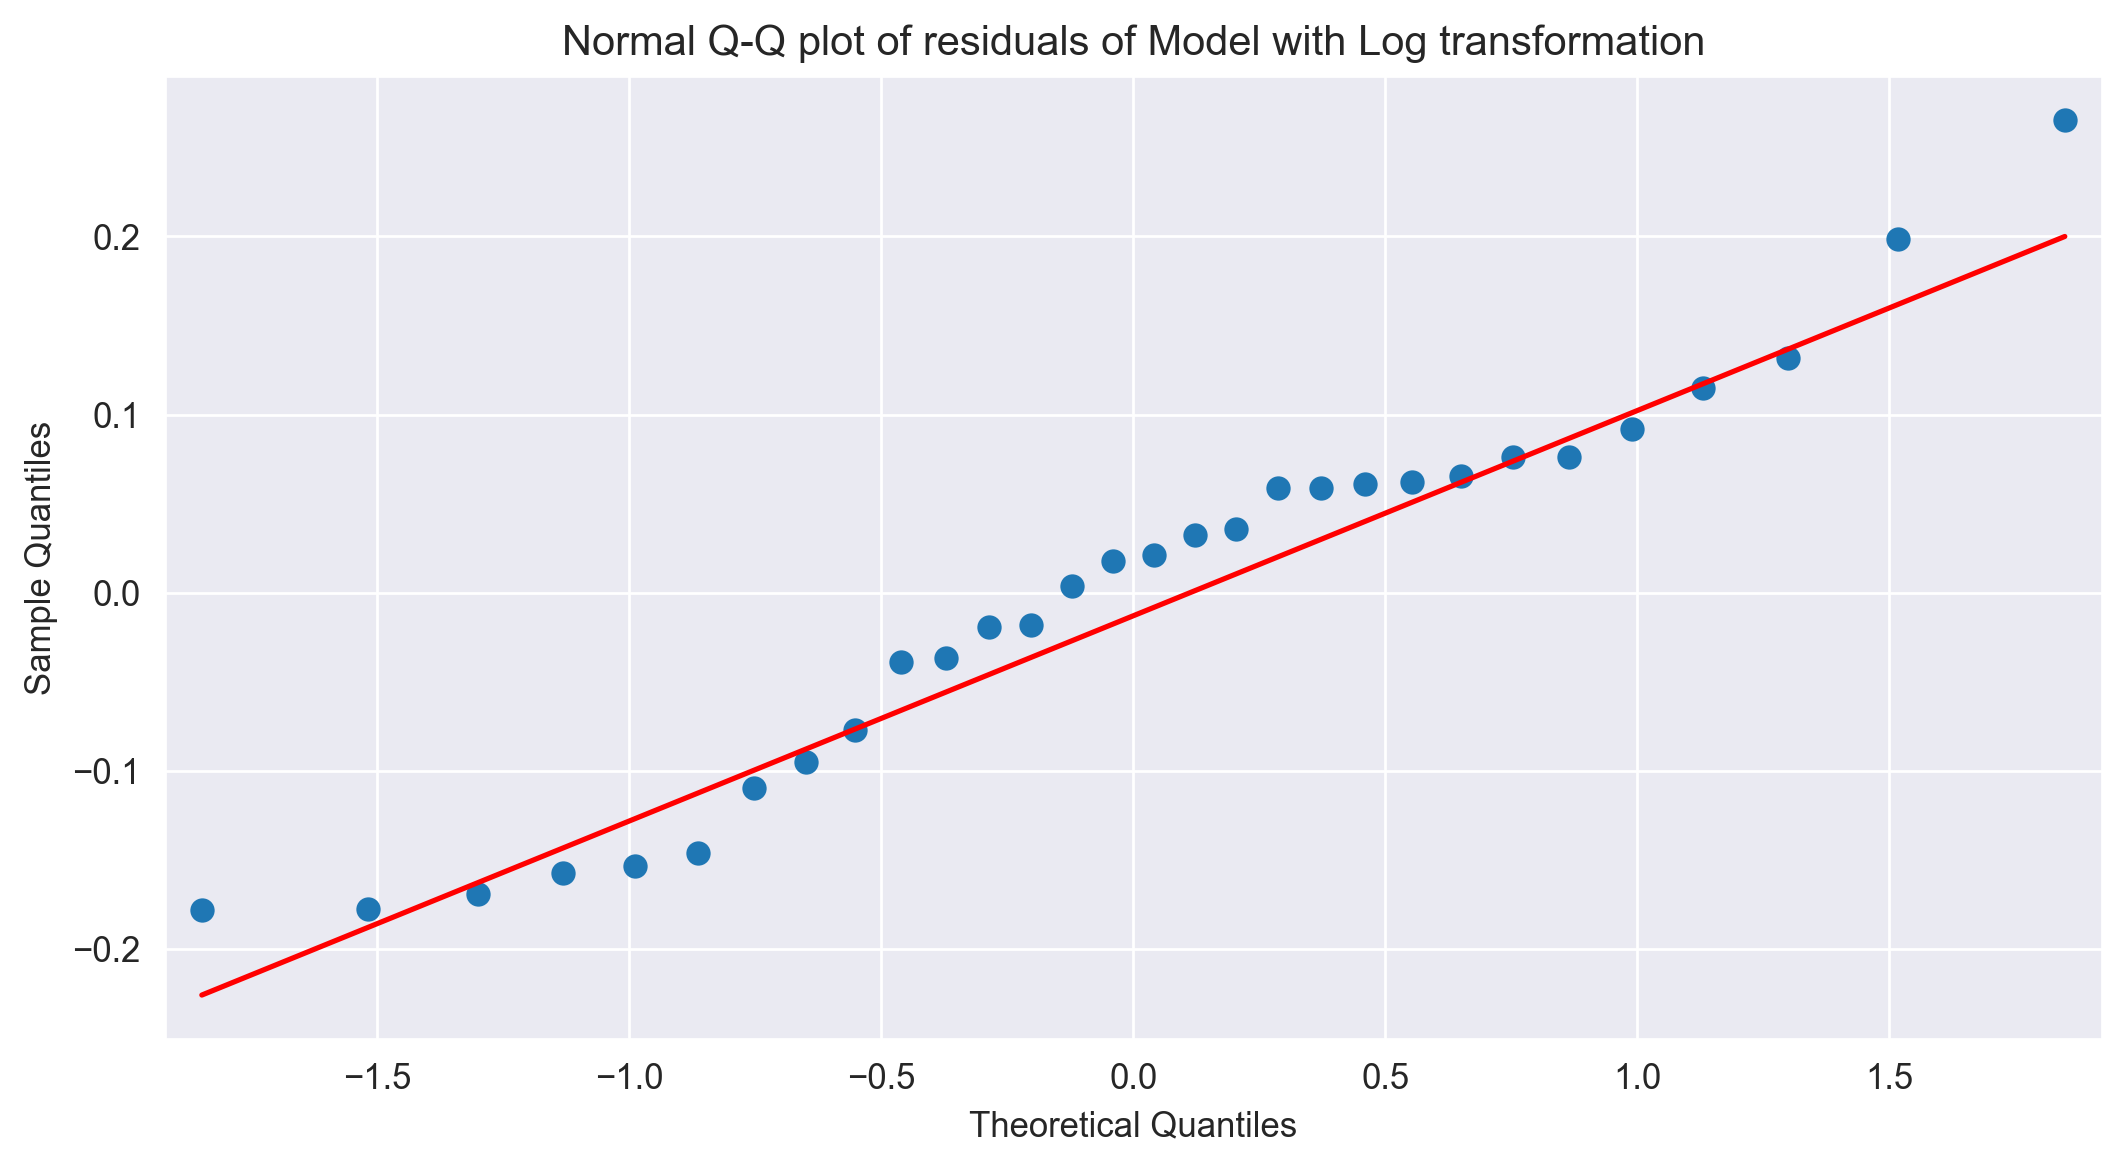

In [69]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')

# Step 9. Predicting values from Model with Log Transformation on the Data¶

In [70]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = df.YearsExperience
predicted['Salary'] = df.Salary
predicted['Predicted_Salary'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
